In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.optimize
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()
import pysces
import pandas as pd
import lmfit


Matplotlib backend set to: "module://ipympl.backend_nbagg"
Matplotlib interface loaded (pysces.plt.m)
Continuation routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.24.4) with SciPy (1.8.0)
Assimulo CVode available
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = C:\Users\Francel\Pysces\psc
pysces.output_dir = C:\Users\Francel\Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details   

In [2]:
data = pd.read_excel (r"C:\Users\Francel\Masters project\Redo analysis (random mechanism) - PPCS\everything_combined.xlsx")

In [3]:
data

Rate   Ppan    Cys  CTP
0    7.308824  0.370  1.000  3.0
1    6.290150  0.180  1.000  3.0
2    5.311180  0.093  1.000  3.0
3    1.806873  0.023  1.000  3.0
4    7.041304  0.370  1.000  3.0
..        ...    ...    ...  ...
157  0.840594  0.046  0.005  1.0
158  1.087532  0.370  0.005  1.0
159  1.046017  0.180  0.005  1.0
160  0.958053  0.093  0.005  1.0
161  0.930210  0.046  0.005  1.0

[162 rows x 4 columns]

In [4]:
#a=Ppan
#b=CTP
def vmax(vf, kppan, kctp, kcys, ppan, ctp,cys): #MM
    return (vf*ppan*ctp*cys)/((ppan+kppan)*(ctp+kctp)*(cys+kcys))

In [5]:
indiv_rate = np.array(pd.concat([data.Rate]))
indiv_CTP = np.array(pd.concat([data.CTP]))
indiv_Ppan = np.array(pd.concat([data.Ppan]))
indiv_Cys = np.array(pd.concat([data.Cys]))

In [6]:
datadict = {'Rate': indiv_rate, 'CTP': indiv_CTP, 'Ppan': indiv_Ppan, 'Cys': indiv_Cys }
fulldata = pd.DataFrame(datadict)

In [7]:
fulldata

Rate  CTP   Ppan    Cys
0    7.308824  3.0  0.370  1.000
1    6.290150  3.0  0.180  1.000
2    5.311180  3.0  0.093  1.000
3    1.806873  3.0  0.023  1.000
4    7.041304  3.0  0.370  1.000
..        ...  ...    ...    ...
157  0.840594  1.0  0.046  0.005
158  1.087532  1.0  0.370  0.005
159  1.046017  1.0  0.180  0.005
160  0.958053  1.0  0.093  0.005
161  0.930210  1.0  0.046  0.005

[162 rows x 4 columns]

In [8]:
mymod4 = Model(vmax, independent_vars=['ppan', 'ctp', 'cys'])
mypar4 = mymod4.make_params(vf=1, kppan=1, kctp=1, kcys = 1)
for p in mypar4:
    mypar4[p].set(min=1e-6, max=1000)
myfit4 = mymod4.fit(fulldata['Rate'], params=mypar4, ppan=fulldata['Ppan'], ctp=fulldata['CTP'], cys=fulldata['Cys'],nan_policy='omit')
print(myfit4.fit_report())

[[Model]]
    Model(vmax)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 161
    # variables        = 4
    chi-square         = 24.6000402
    reduced chi-square = 0.15668815
    Akaike info crit   = -294.463662
    Bayesian info crit = -282.138045
    R-squared          = 0.95515363
[[Variables]]
    vf:     10.2979635 +/- 0.30169043 (2.93%) (init = 1)
    kppan:  0.08426457 +/- 0.00529398 (6.28%) (init = 1)
    kctp:   0.33969172 +/- 0.02394257 (7.05%) (init = 1)
    kcys:   0.01595832 +/- 0.00111846 (7.01%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(vf, kppan) = +0.7066
    C(vf, kctp)  = +0.5897
    C(vf, kcys)  = +0.1939


In [9]:
myfit4

In [10]:
CTPvals = data.CTP.unique()
Ppanvals = data.Ppan.unique()
Cysvals = data.Cys.unique()

## Visualisation for varying CTP:

(1) Ppan = 0.37mM, Cys fixed = 1mM , CTP = varies

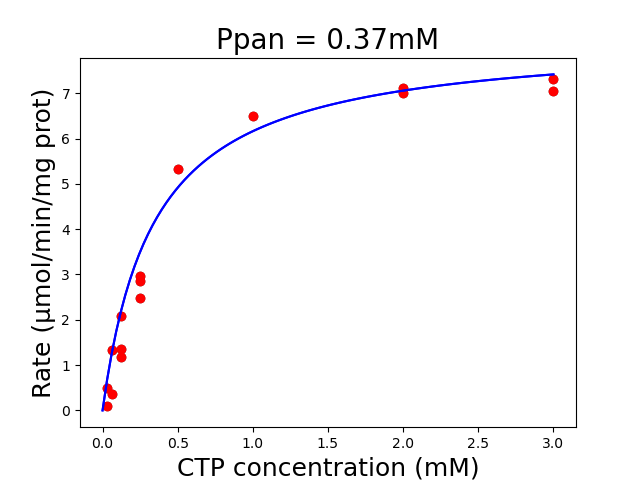

In [12]:
xvals = np.linspace(0, 3, 100)

# Model evaluation
modelfit_result1 = mymod4.eval(myfit4.params, ppan=0.37, ctp=xvals, cys=1)
filtered1 = fulldata[(fulldata.Cys == 1) & (fulldata.Ppan == 0.37)]

plt.plot(xvals,modelfit_result1, color='blue')
plt.scatter(filtered1['CTP'], filtered1['Rate'], color='red')
# Customize font sizes
plt.xlabel('CTP concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.37mM', fontsize=20)

plt.show()


In [13]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [14]:
plt.savefig("CTP_fig1.png")

In [15]:
plt.close('all')

(2) Ppan = 0.18 mM, Cys fixed = 1mM , CTP = varies

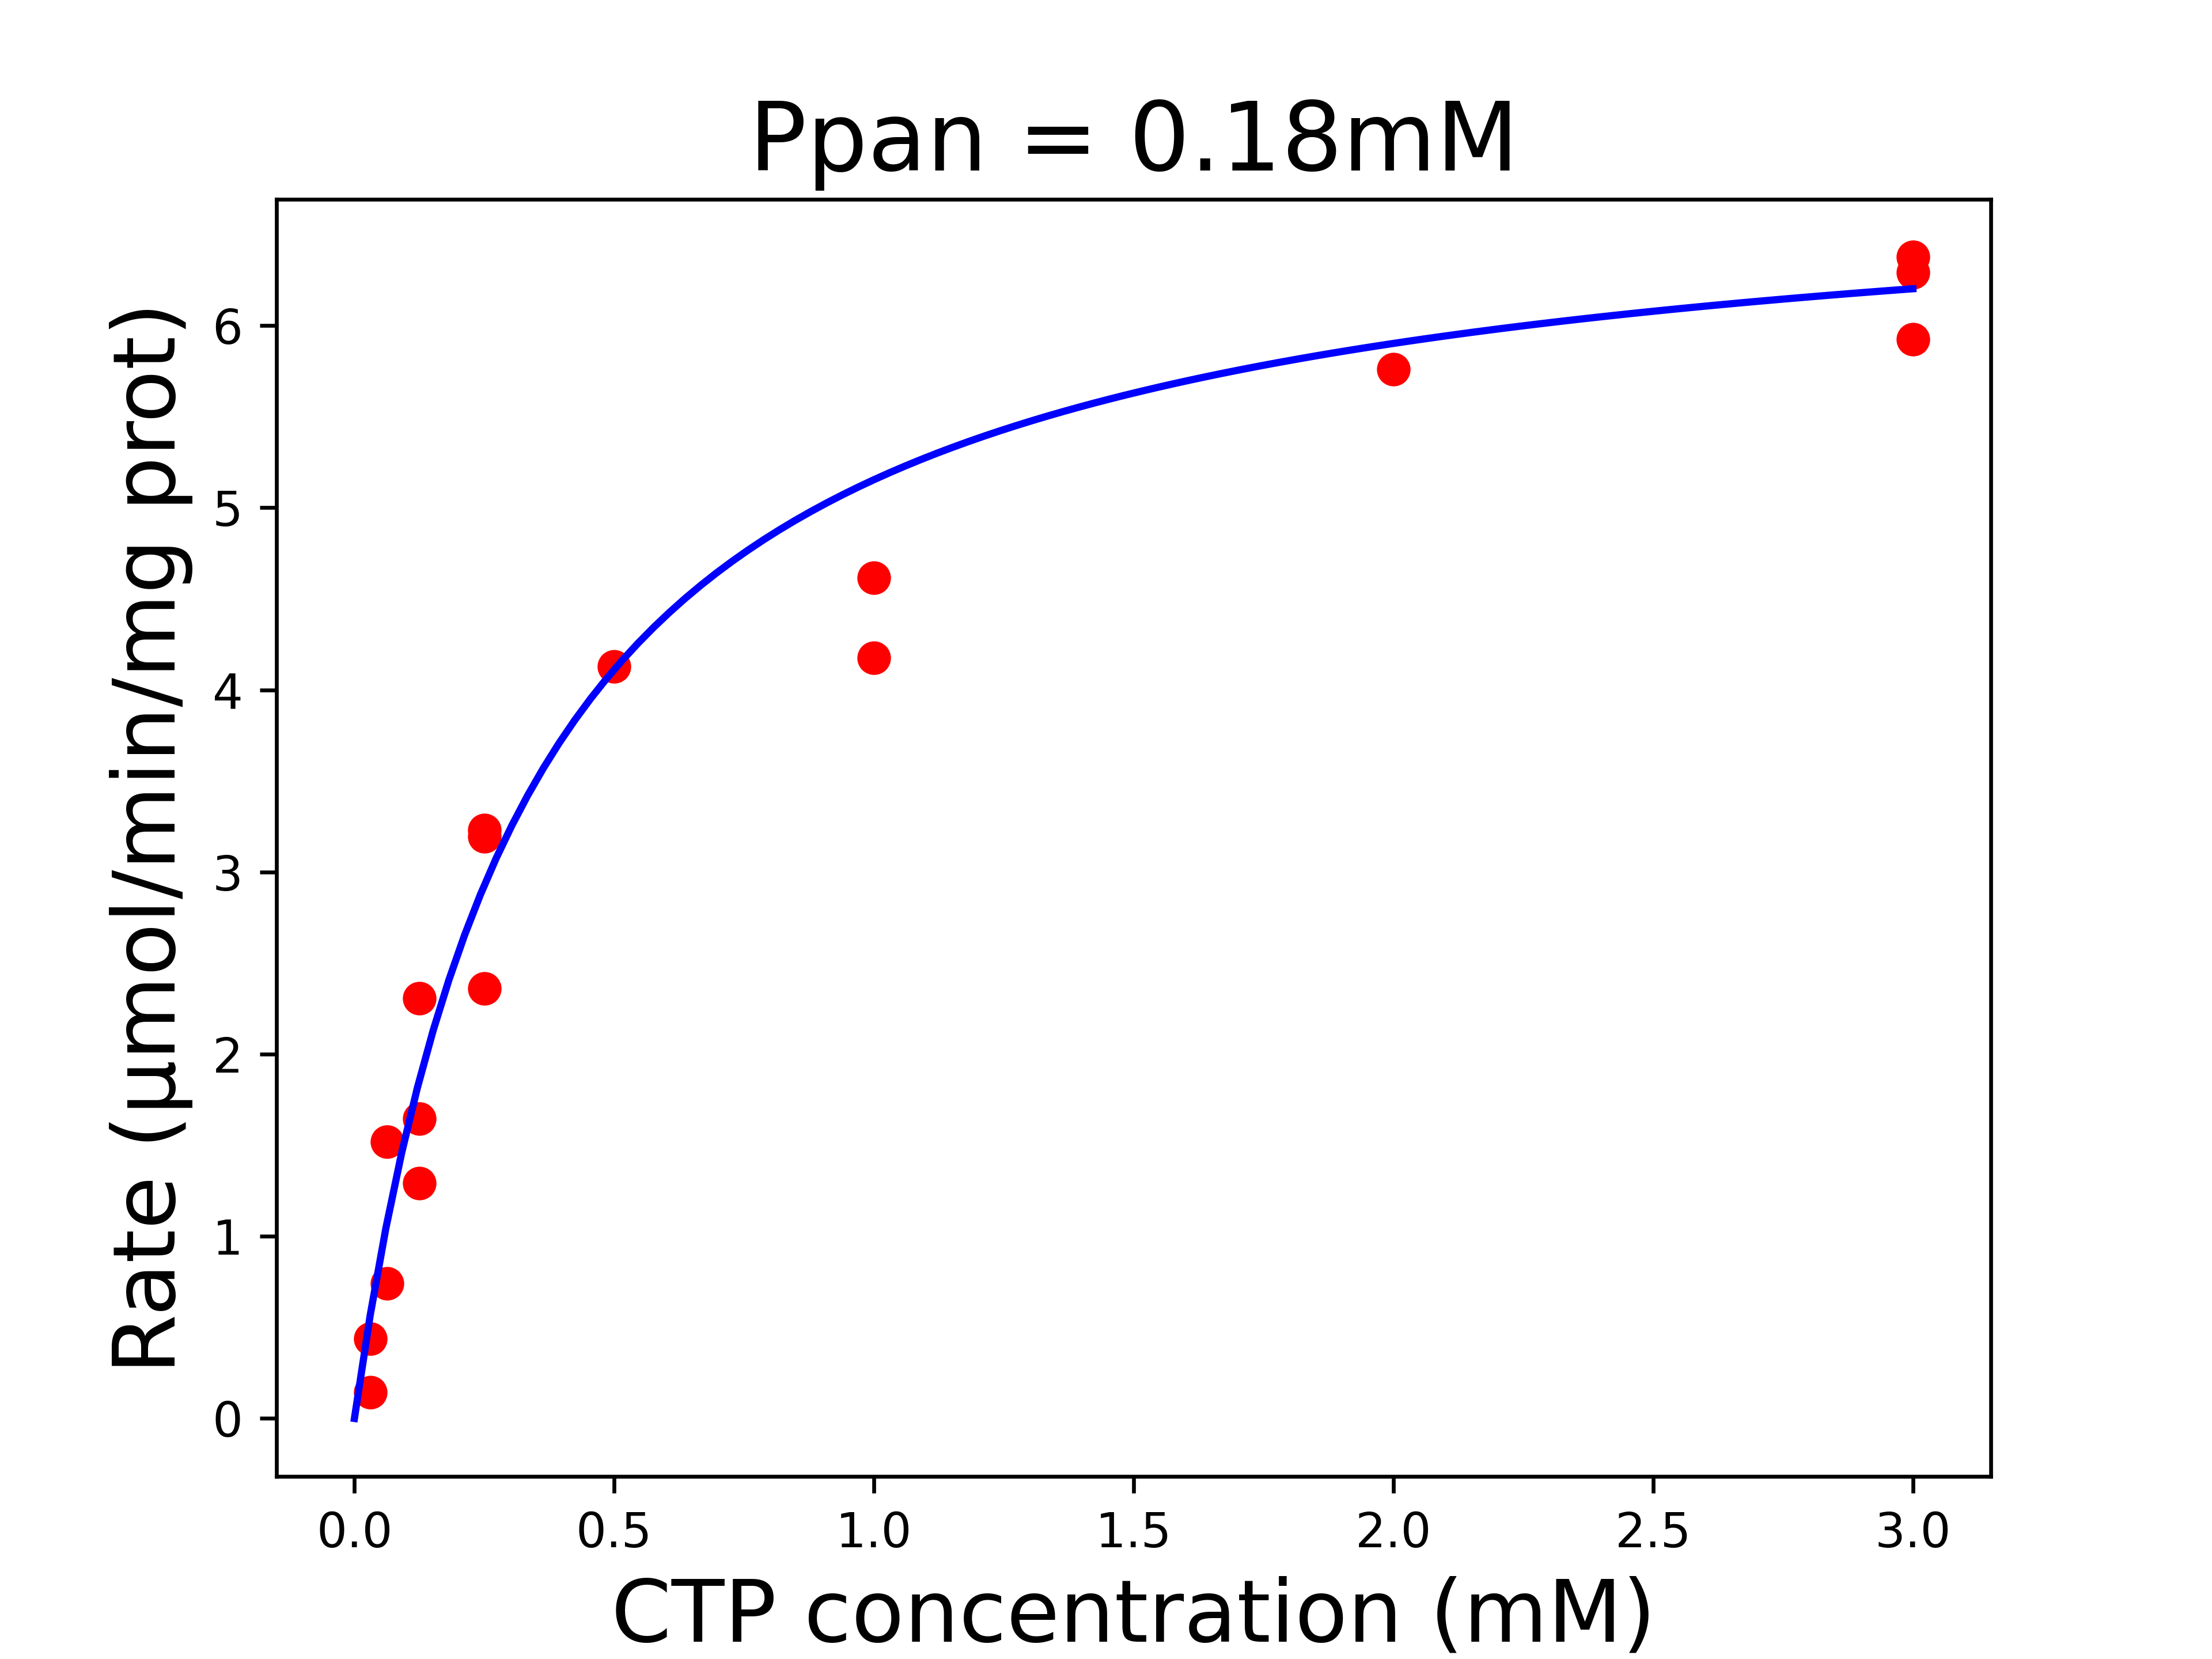

In [25]:
xvals = np.linspace(0, 3, 100)

#Plot 2:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.18, ctp = xvals, cys = 1)
filtered1 = fulldata[(fulldata.Cys == 1) & (fulldata.Ppan == 0.18)]

plt.plot(xvals,modelfit_result1, color='blue')
plt.scatter(filtered1['CTP'], filtered1['Rate'], color='red')
plt.xlabel('CTP concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.18mM', fontsize=20)


plt.show()

In [26]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [27]:
plt.savefig("CTP_fig2.png")

In [28]:
plt.close('all')

(3) Ppan = 0.093mM, Cys fixed = 1mM , CTP = varies

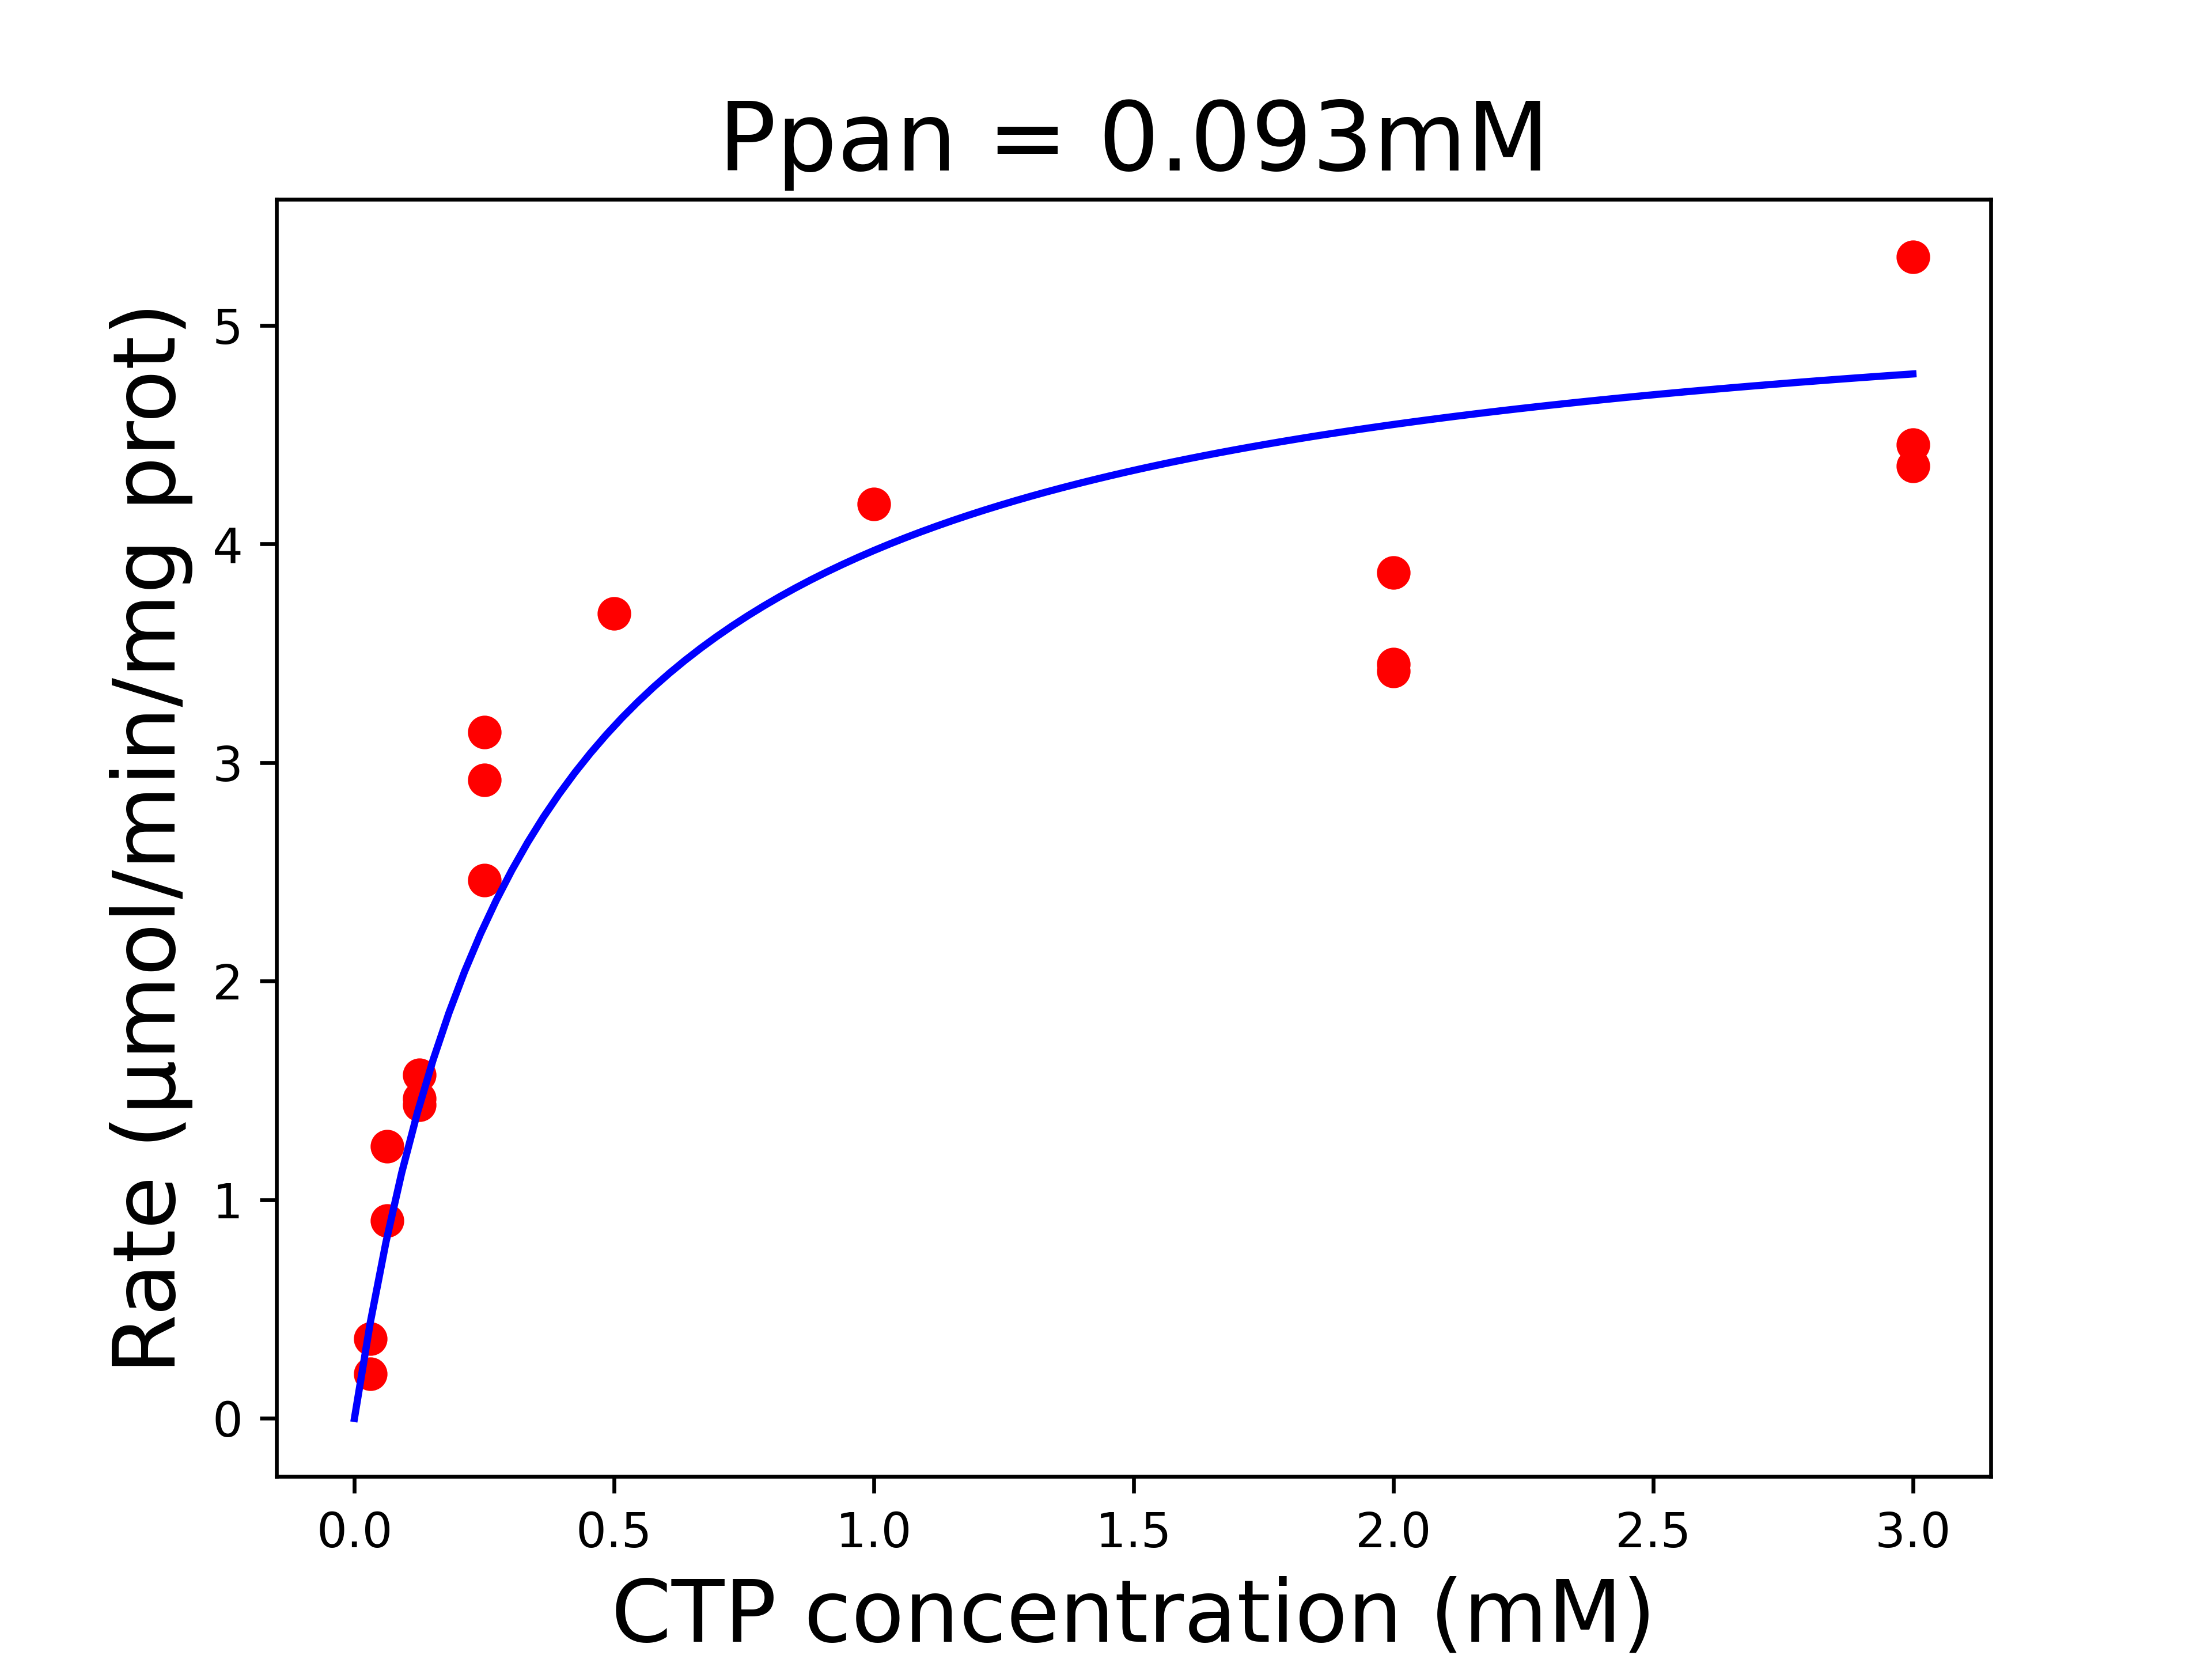

In [29]:
xvals = np.linspace(0, 3, 100)

#Plot 3:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.093, ctp = xvals, cys = 1)
filtered1 = fulldata[(fulldata.Cys == 1) & (fulldata.Ppan == 0.093)]

plt.plot(xvals,modelfit_result1, color='blue')
plt.scatter(filtered1['CTP'], filtered1['Rate'], color='red')
plt.xlabel('CTP concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.093mM', fontsize=20)
plt.show()

In [30]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [31]:
plt.savefig("CTP_fig3.png")

In [32]:
plt.close('all')

(4) Ppan = 0.046mM, Cys fixed = 1mM , CTP = varies

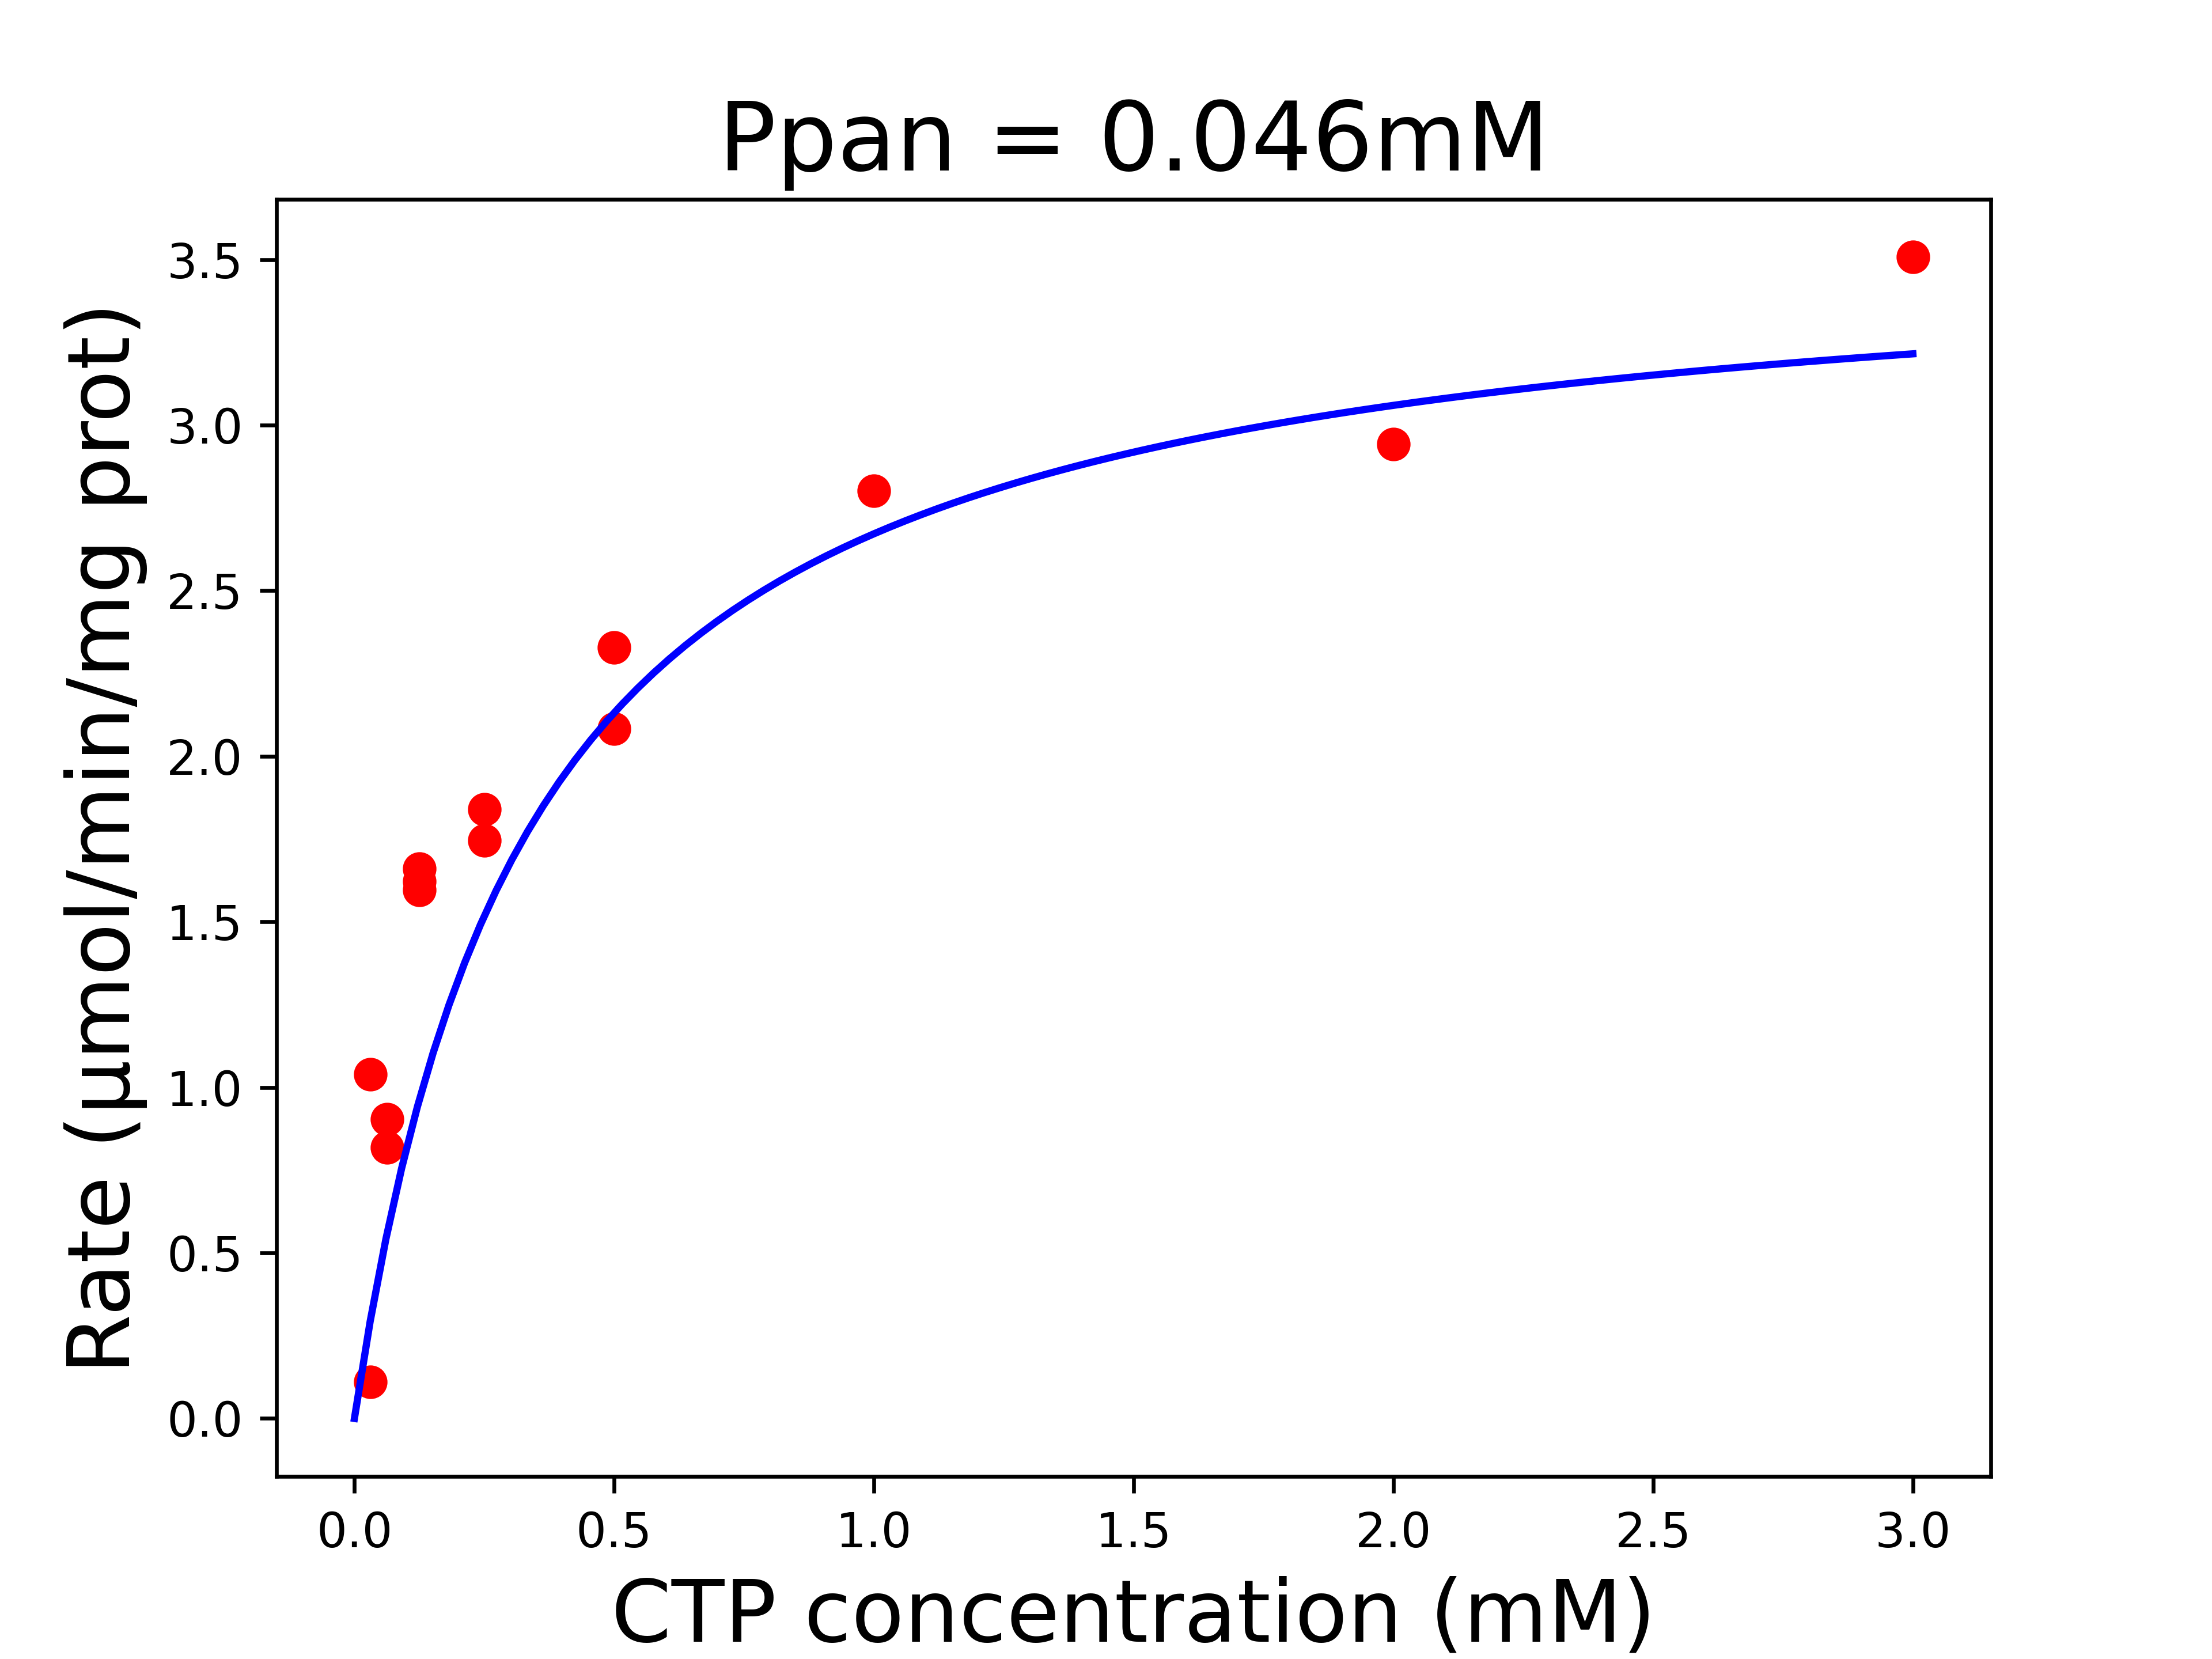

In [33]:
xvals = np.linspace(0, 3, 100)

#Plot 4:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.046, ctp = xvals, cys = 1)
filtered1 = fulldata[(fulldata.Cys == 1) & (fulldata.Ppan == 0.046)]

plt.plot(xvals, modelfit_result1, color='blue')
plt.scatter(filtered1['CTP'], filtered1['Rate'], color='red')
plt.xlabel('CTP concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.046mM', fontsize=20)
plt.show()

In [34]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [35]:
plt.savefig("CTP_fig4.png")

In [36]:
plt.close('all')

(5) Ppan = 0.023mM, Cys fixed = 1mM , CTP = varies

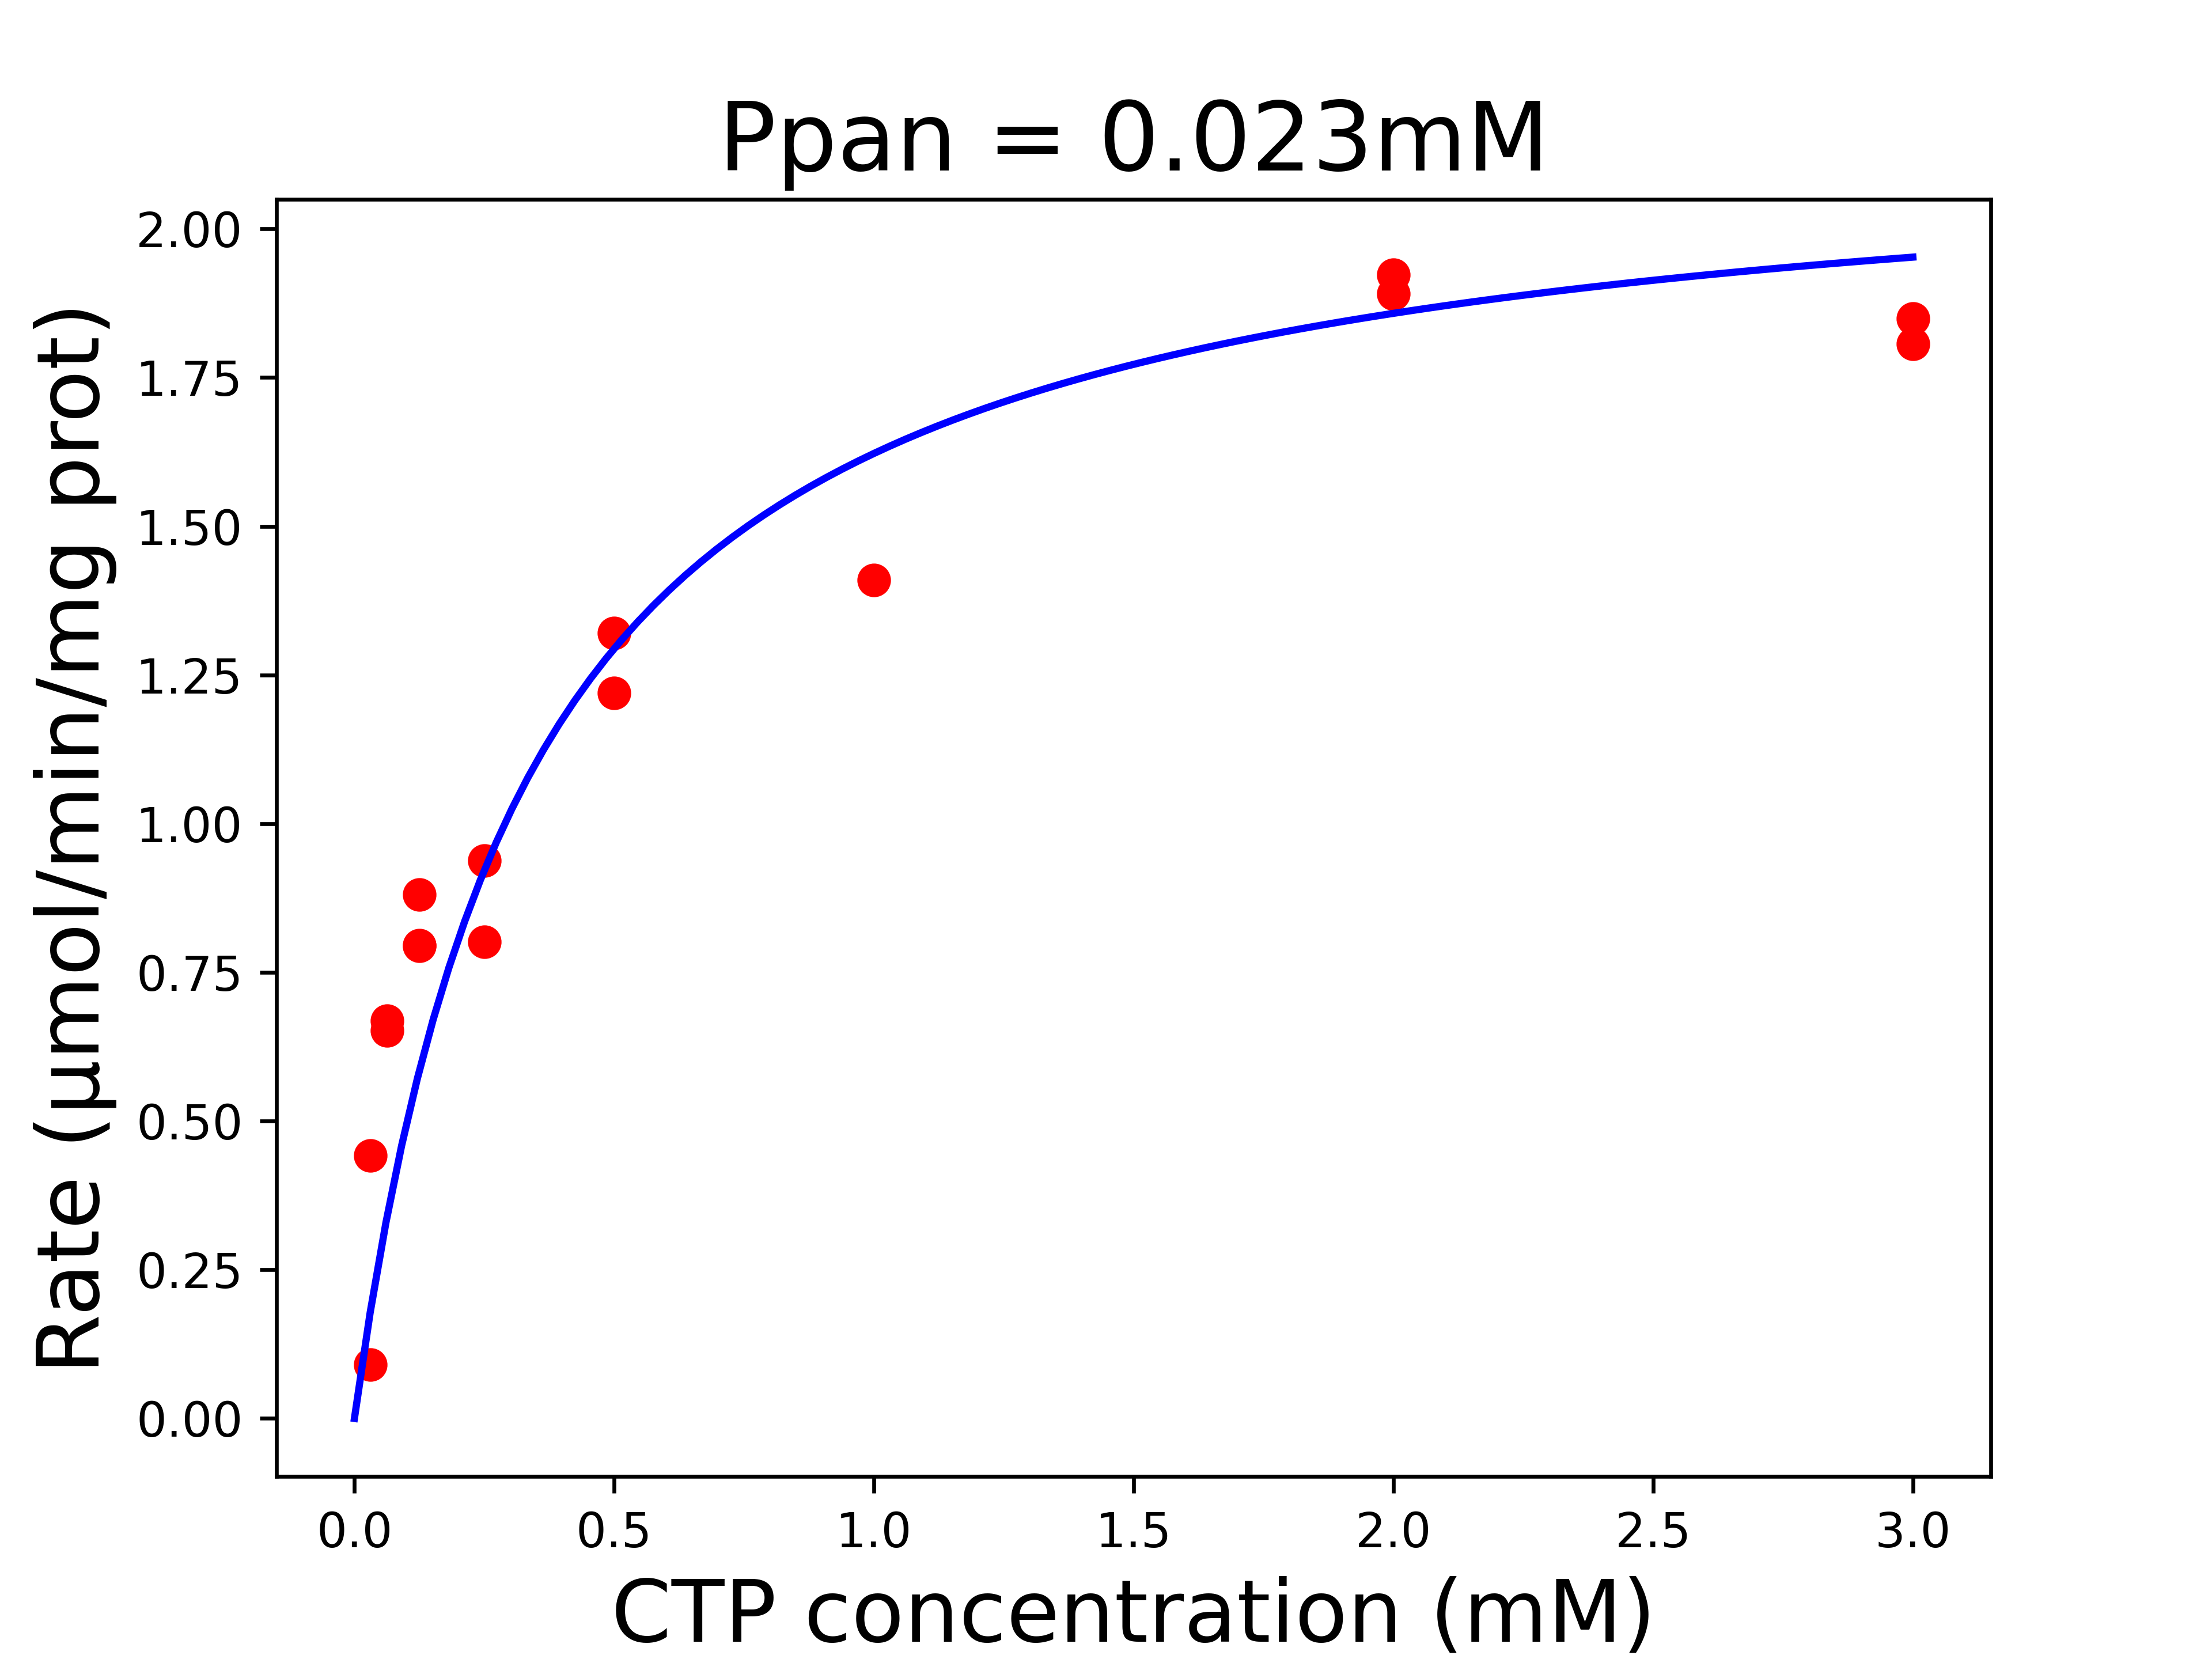

In [37]:
xvals = np.linspace(0, 3, 100)

#Plot 4:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.023, ctp = xvals, cys = 1)
filtered1 = fulldata[(fulldata.Cys == 1) & (fulldata.Ppan == 0.023)]

plt.plot(xvals,modelfit_result1, color='blue')
plt.scatter(filtered1['CTP'], filtered1['Rate'], color='red')
plt.xlabel('CTP concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.023mM', fontsize=20)
plt.show()

In [38]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [39]:
plt.savefig("CTP_fig5.png")

In [40]:
plt.close('all')

## Visualisation for varying Cys:

(1) Ppan = 0.37mM, CTP fixed = 1mM , Cys = varies

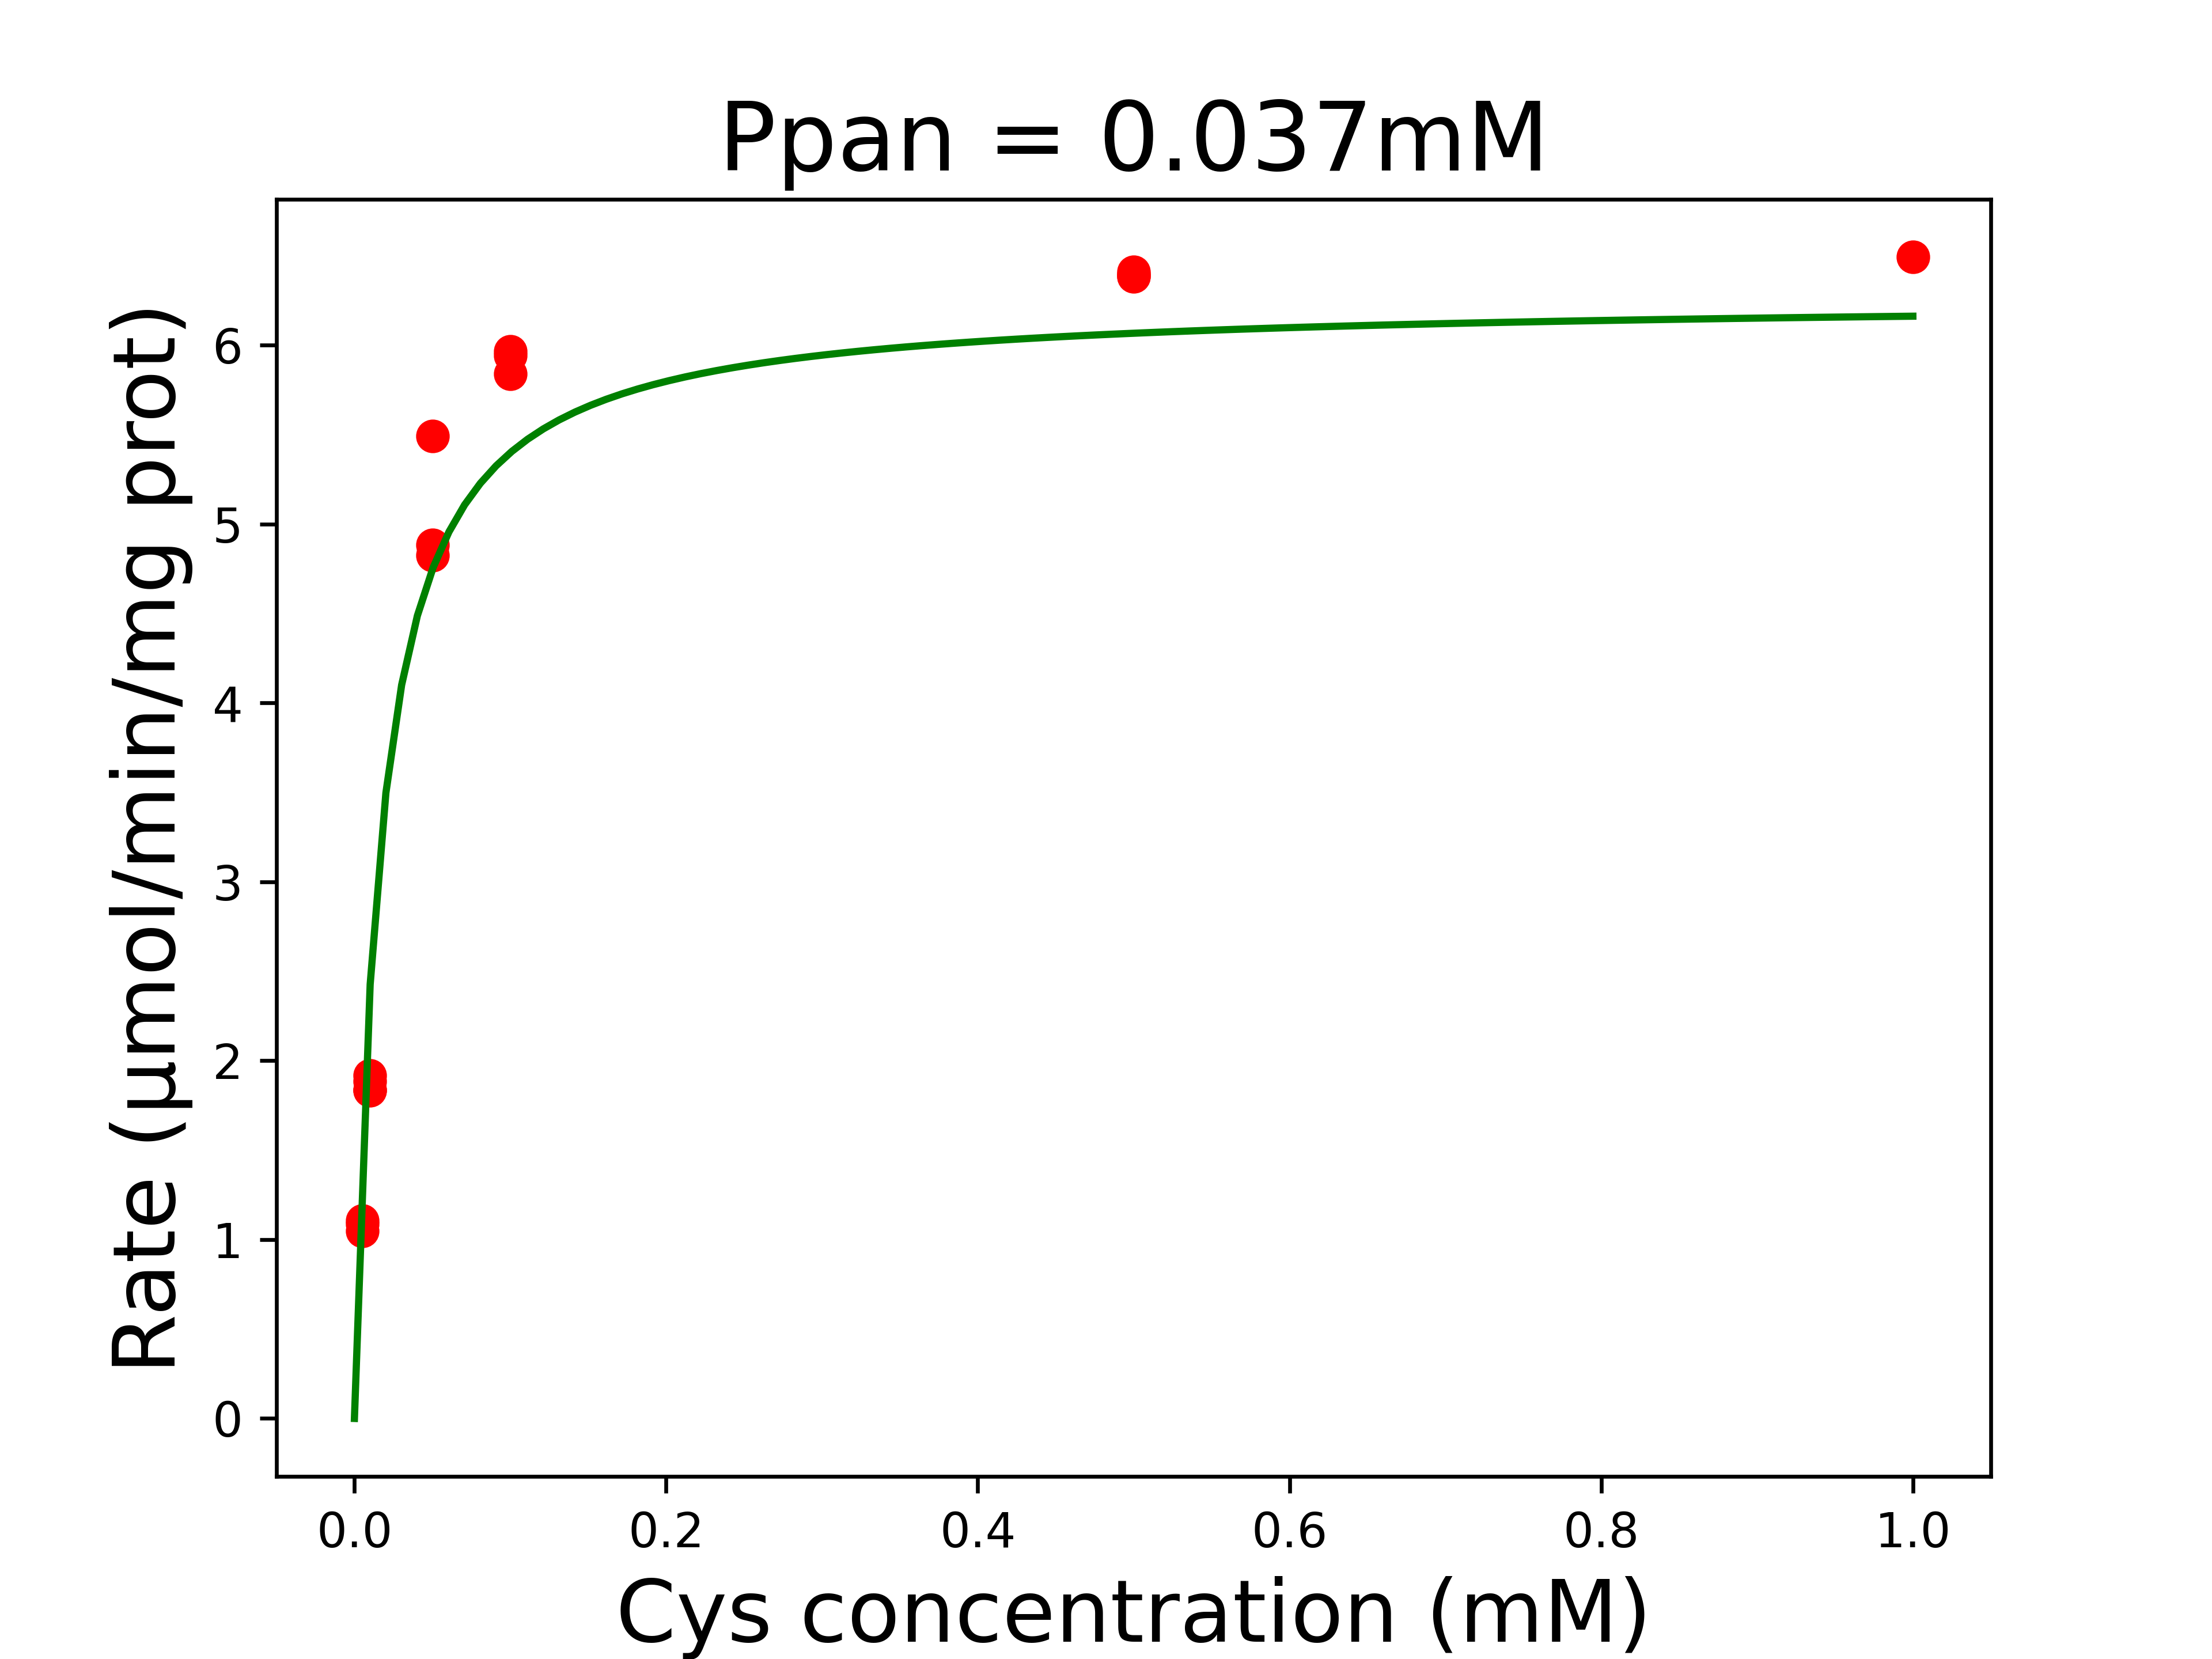

In [41]:
cys_vals = np.linspace(0, 1, 100)


#Plot 5:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.37, ctp = 1, cys = cys_vals)
filtered1 = fulldata[(fulldata.CTP == 1) & (fulldata.Ppan == 0.37)]

plt.plot(cys_vals,modelfit_result1, color='green')
plt.scatter(filtered1['Cys'],filtered1['Rate'], color='red')
plt.xlabel('Cys concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.037mM', fontsize=20)
plt.show()

In [42]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [43]:
plt.savefig("Cys_fig1.png")

In [44]:
plt.close('all')

(2) Ppan = 0.18mM, CTP fixed = 1mM , Cys = varies

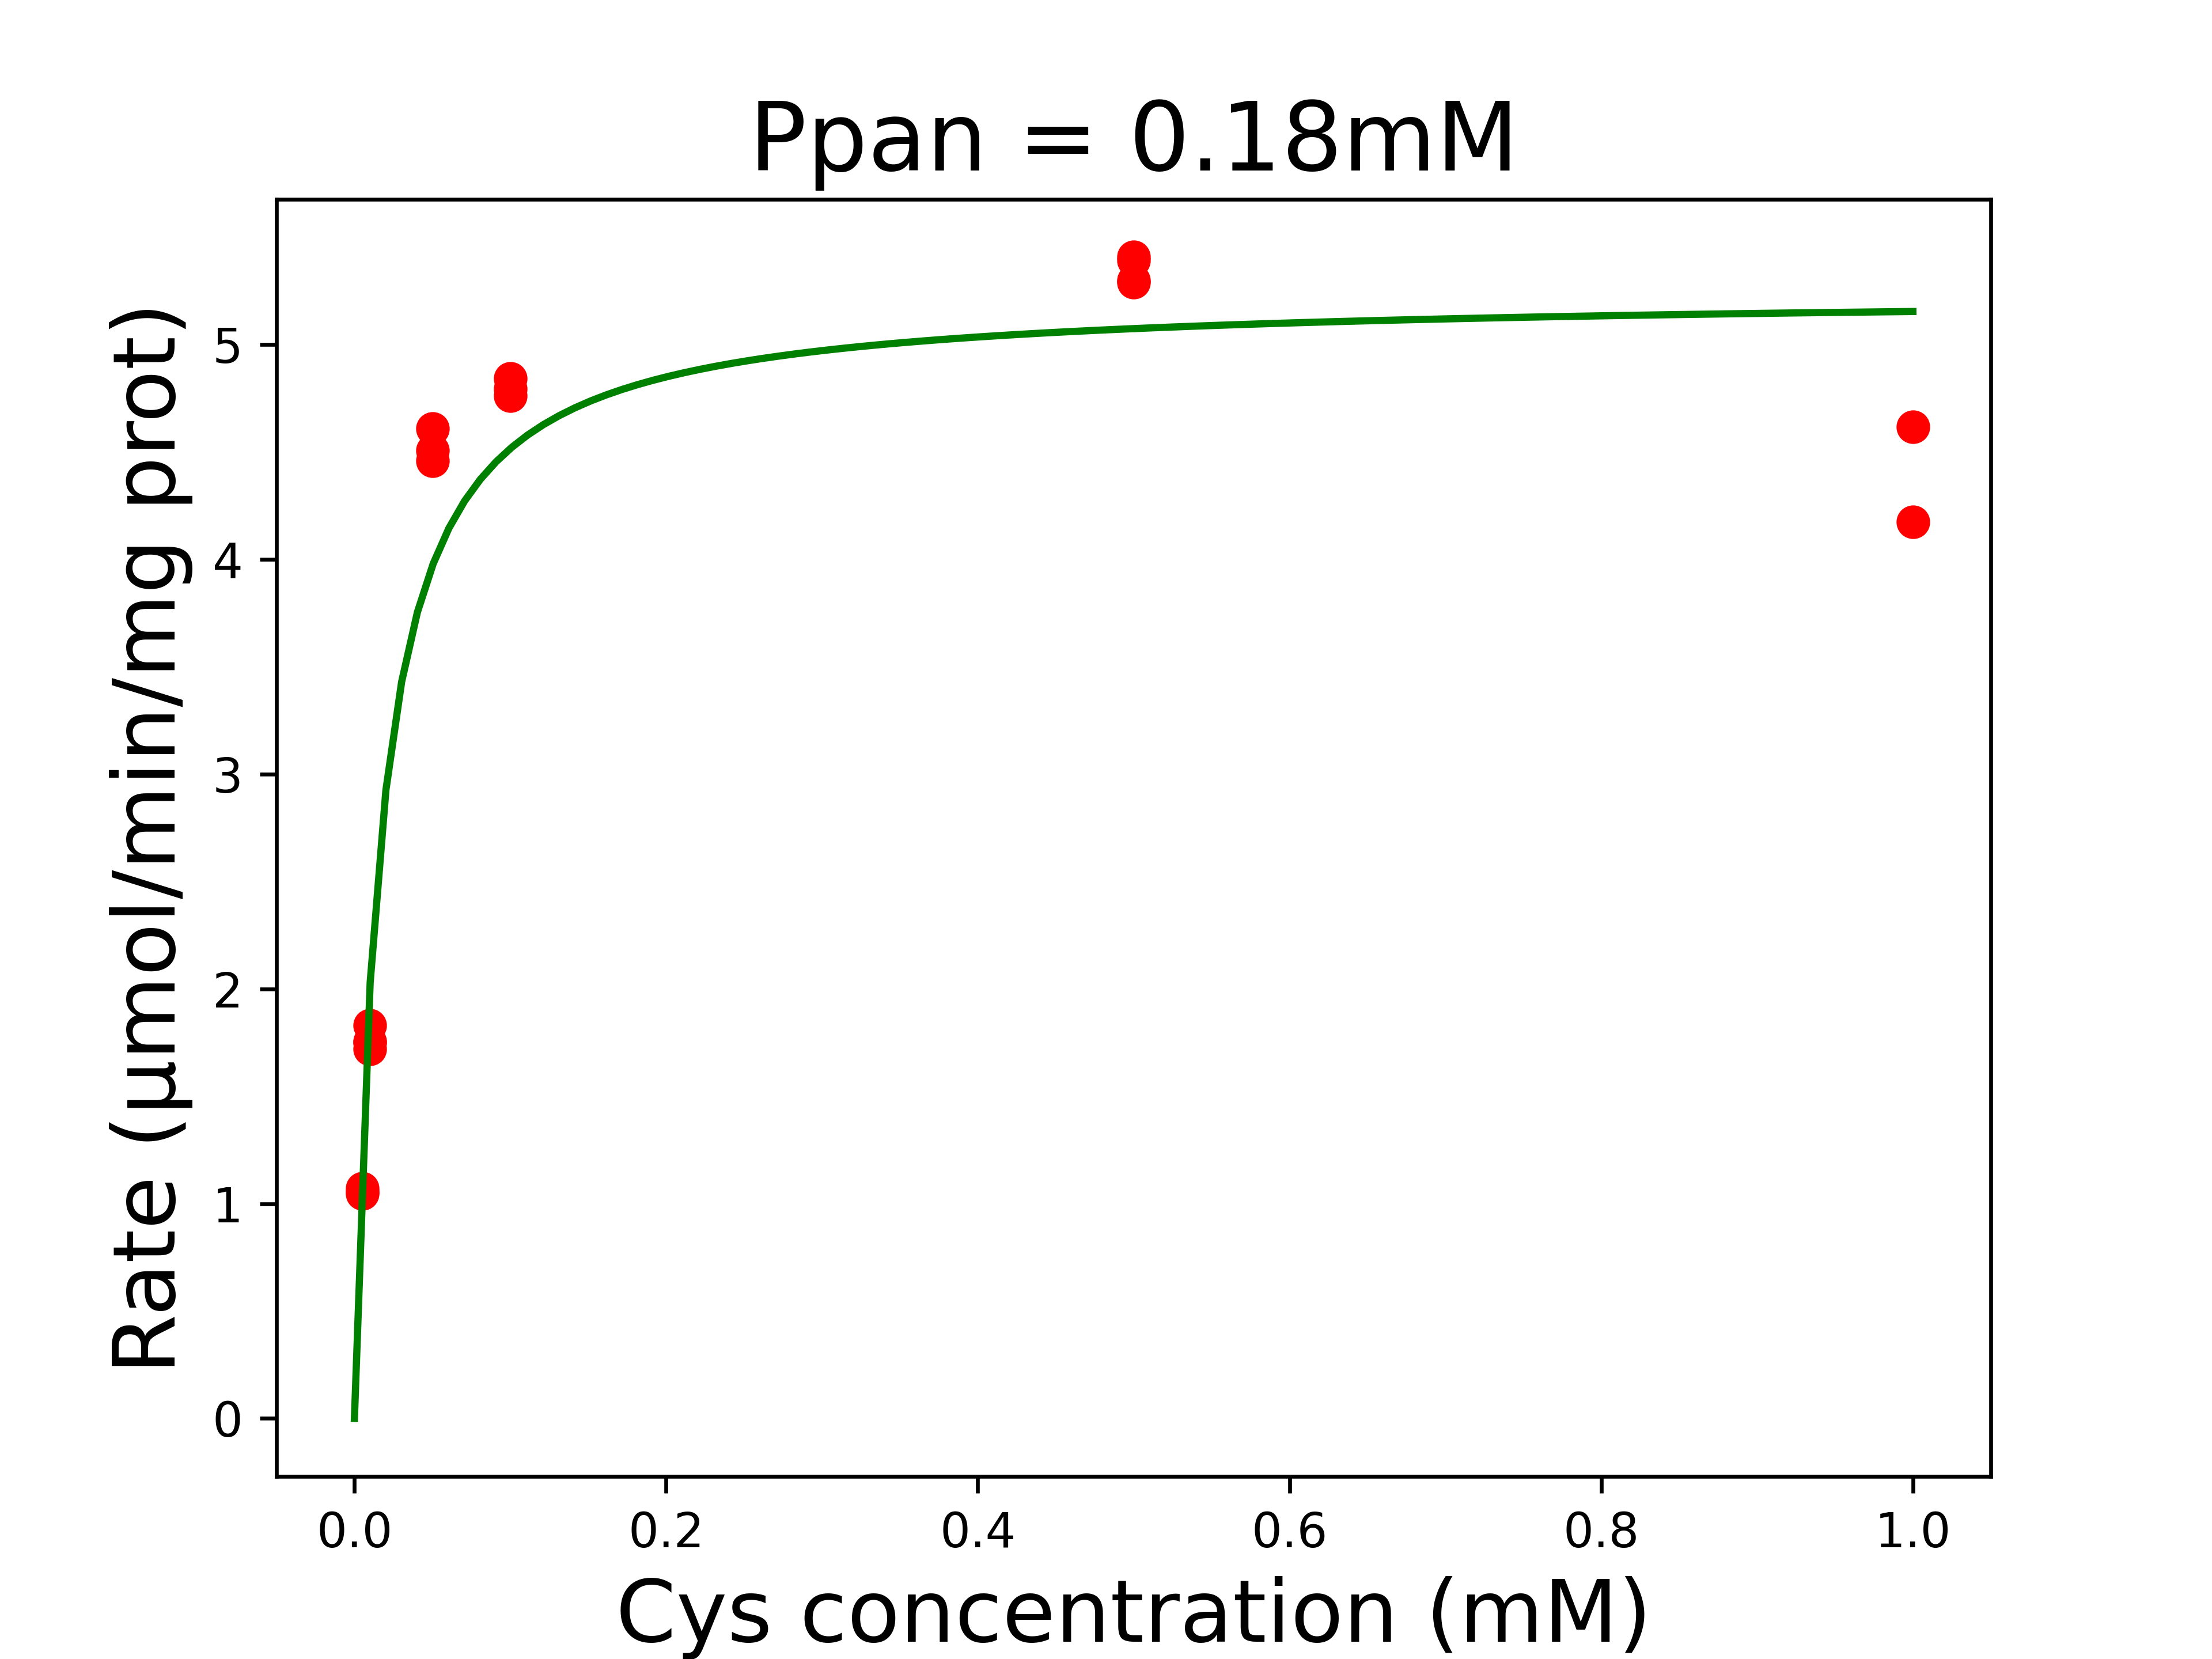

In [45]:
cys_vals = np.linspace(0, 1, 100)


#Plot 5:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.18, ctp = 1, cys = cys_vals)
filtered1 = fulldata[(fulldata.CTP == 1) & (fulldata.Ppan == 0.18)]

plt.plot(cys_vals,modelfit_result1,color='green')
plt.scatter(filtered1['Cys'],filtered1['Rate'], color='red')
plt.xlabel('Cys concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.18mM', fontsize=20)
plt.show()

In [46]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [47]:
plt.savefig("Cys_fig2.png")

In [48]:
plt.close('all')

(3) Ppan = 0.093mM, CTP fixed = 1mM , Cys = varies

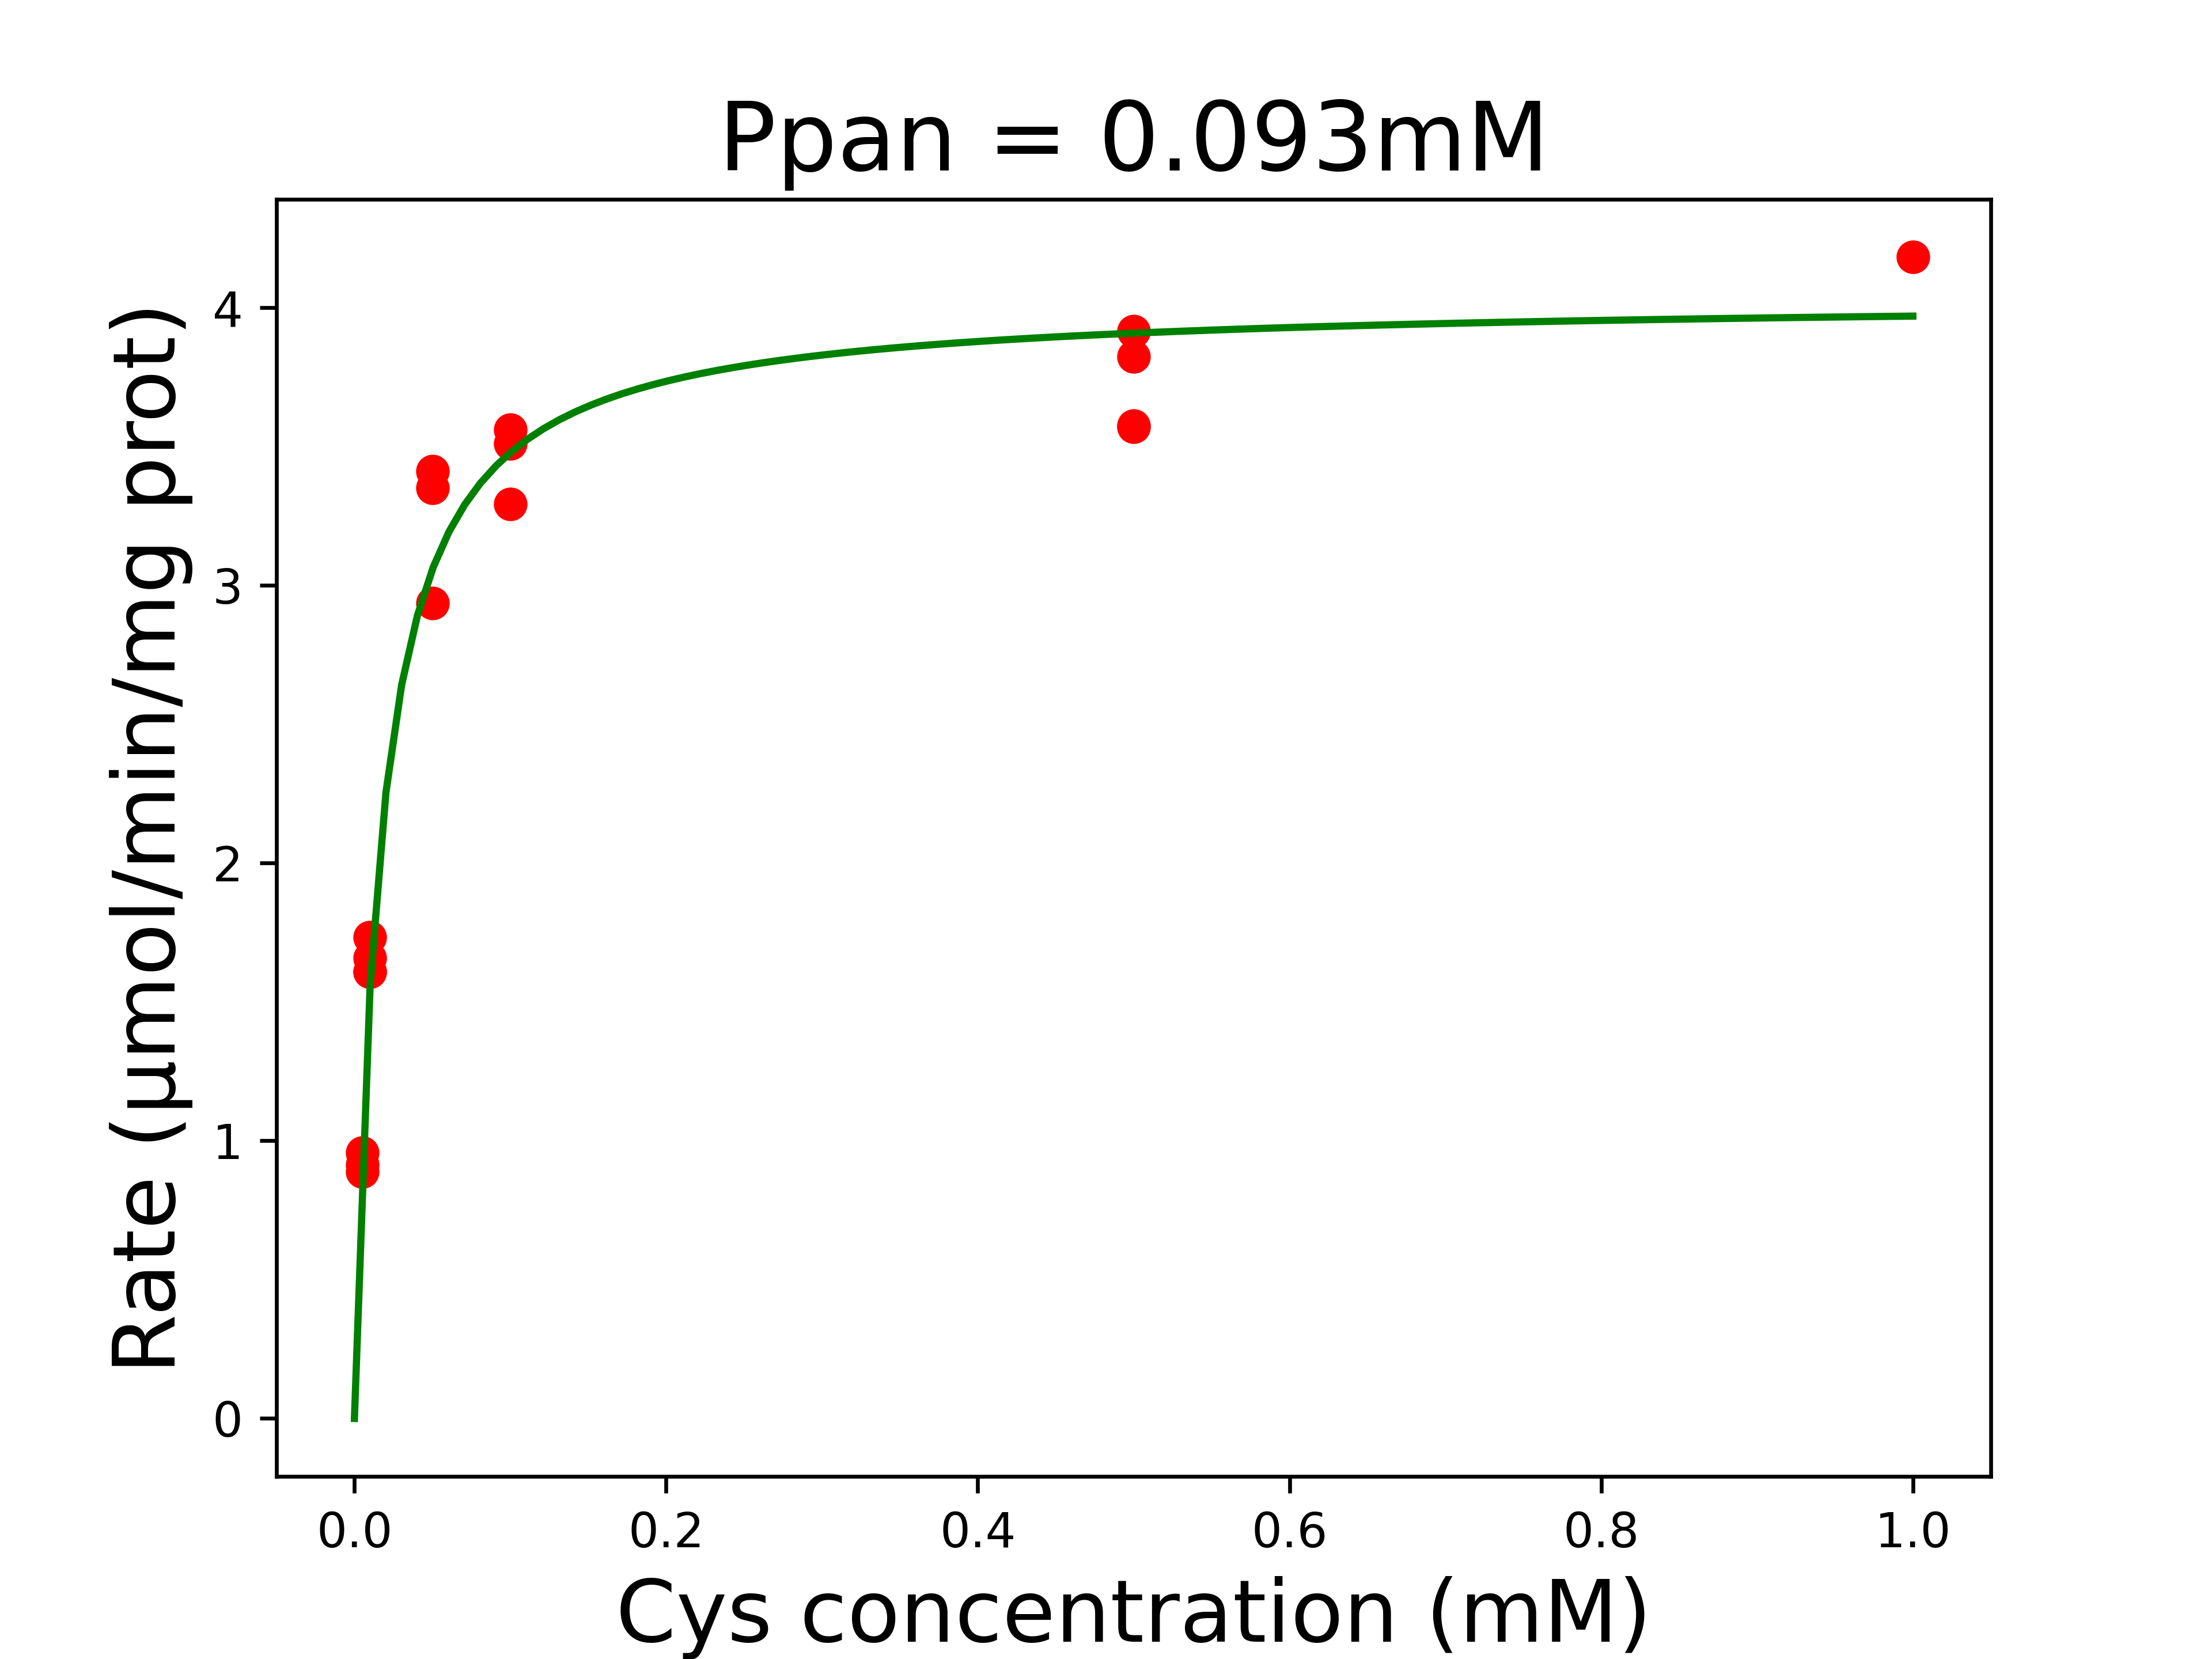

In [49]:
cys_vals = np.linspace(0, 1, 100)


#Plot 5:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.093, ctp = 1, cys = cys_vals)
filtered1 = fulldata[(fulldata.CTP == 1) & (fulldata.Ppan == 0.093)]

plt.plot(cys_vals,modelfit_result1,color='green')
plt.scatter(filtered1['Cys'],filtered1['Rate'], color='red')
plt.xlabel('Cys concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.093mM', fontsize=20)
plt.show()

In [50]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [51]:
plt.savefig("Cys_fig3.png")

In [52]:
plt.close('all')

(4) Ppan = 0.046mM, CTP fixed = 1mM , Cys = varies

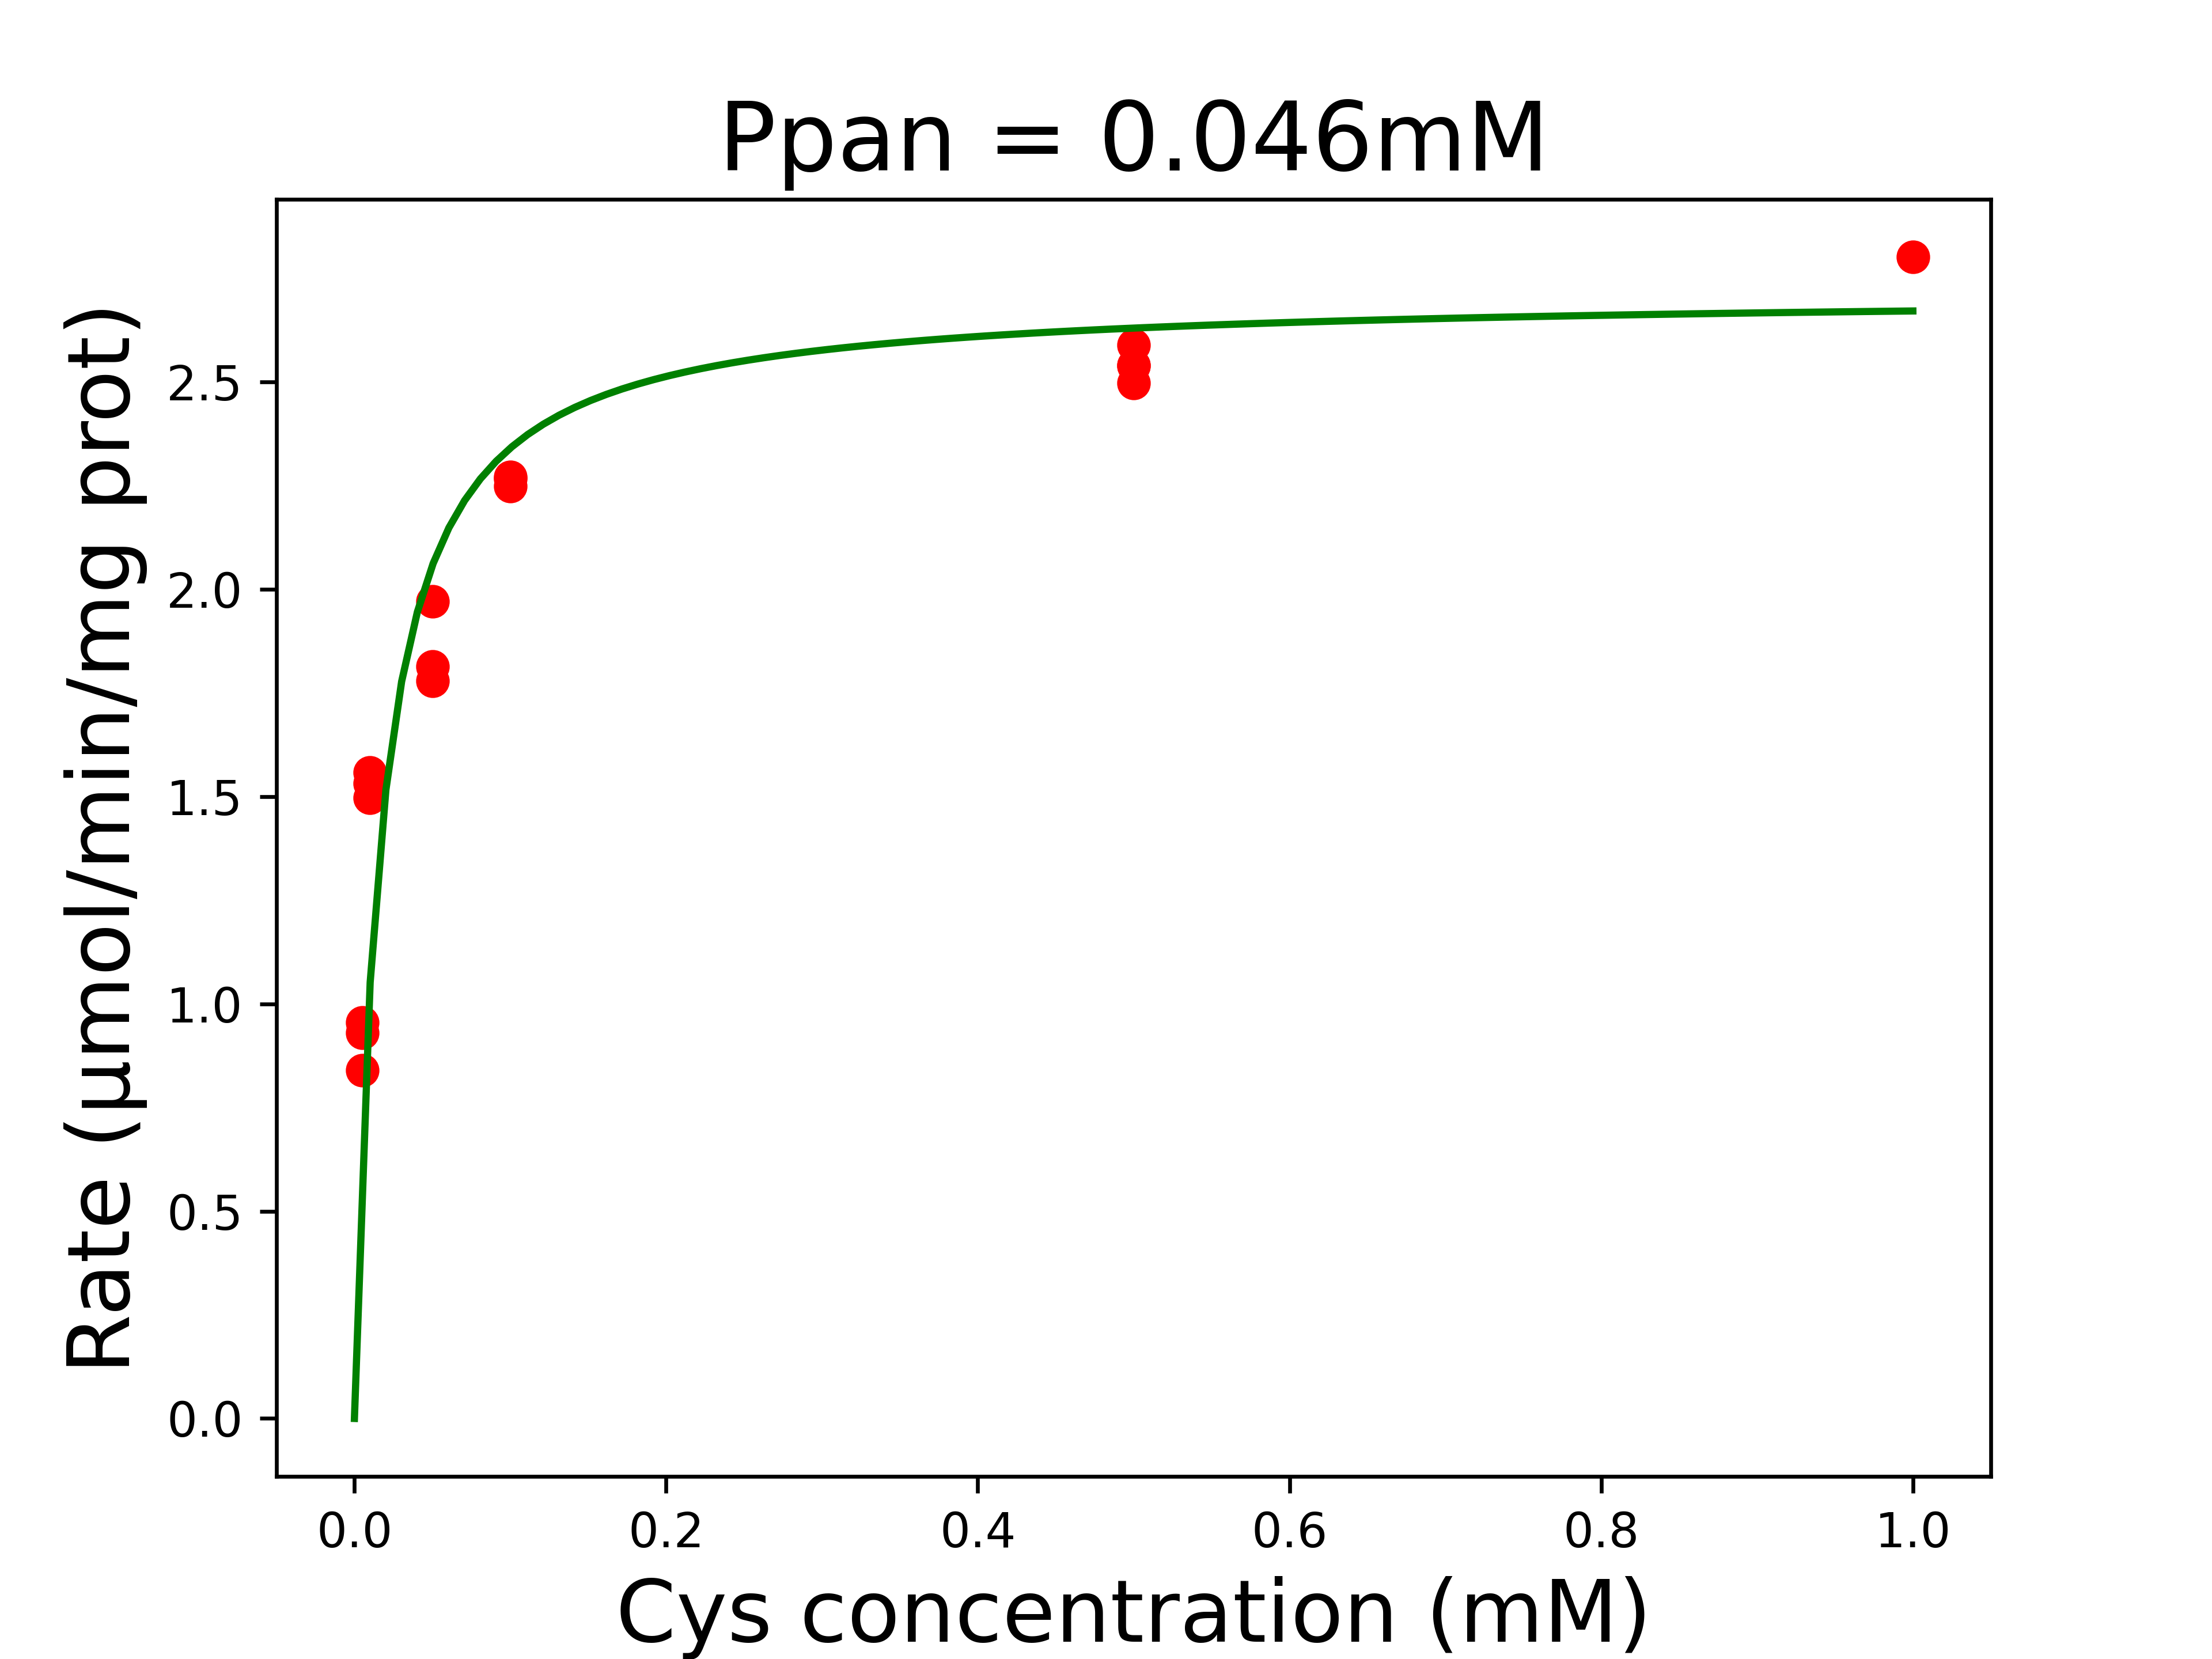

In [53]:
cys_vals = np.linspace(0, 1, 100)


#Plot 5:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.046, ctp = 1, cys = cys_vals)
filtered1 = fulldata[(fulldata.CTP == 1) & (fulldata.Ppan == 0.046)]

plt.plot(cys_vals,modelfit_result1,color='green')
plt.scatter(filtered1['Cys'],filtered1['Rate'], color='red')
plt.xlabel('Cys concentration (mM)', fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)', fontsize=18)
plt.title('Ppan = 0.046mM', fontsize=20)
plt.show()

In [17]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [18]:
plt.savefig("Cys_fig4.png")

In [19]:
plt.close('all')

(5) Ppan = 0.023mM, CTP fixed = 1mM , Cys = varies

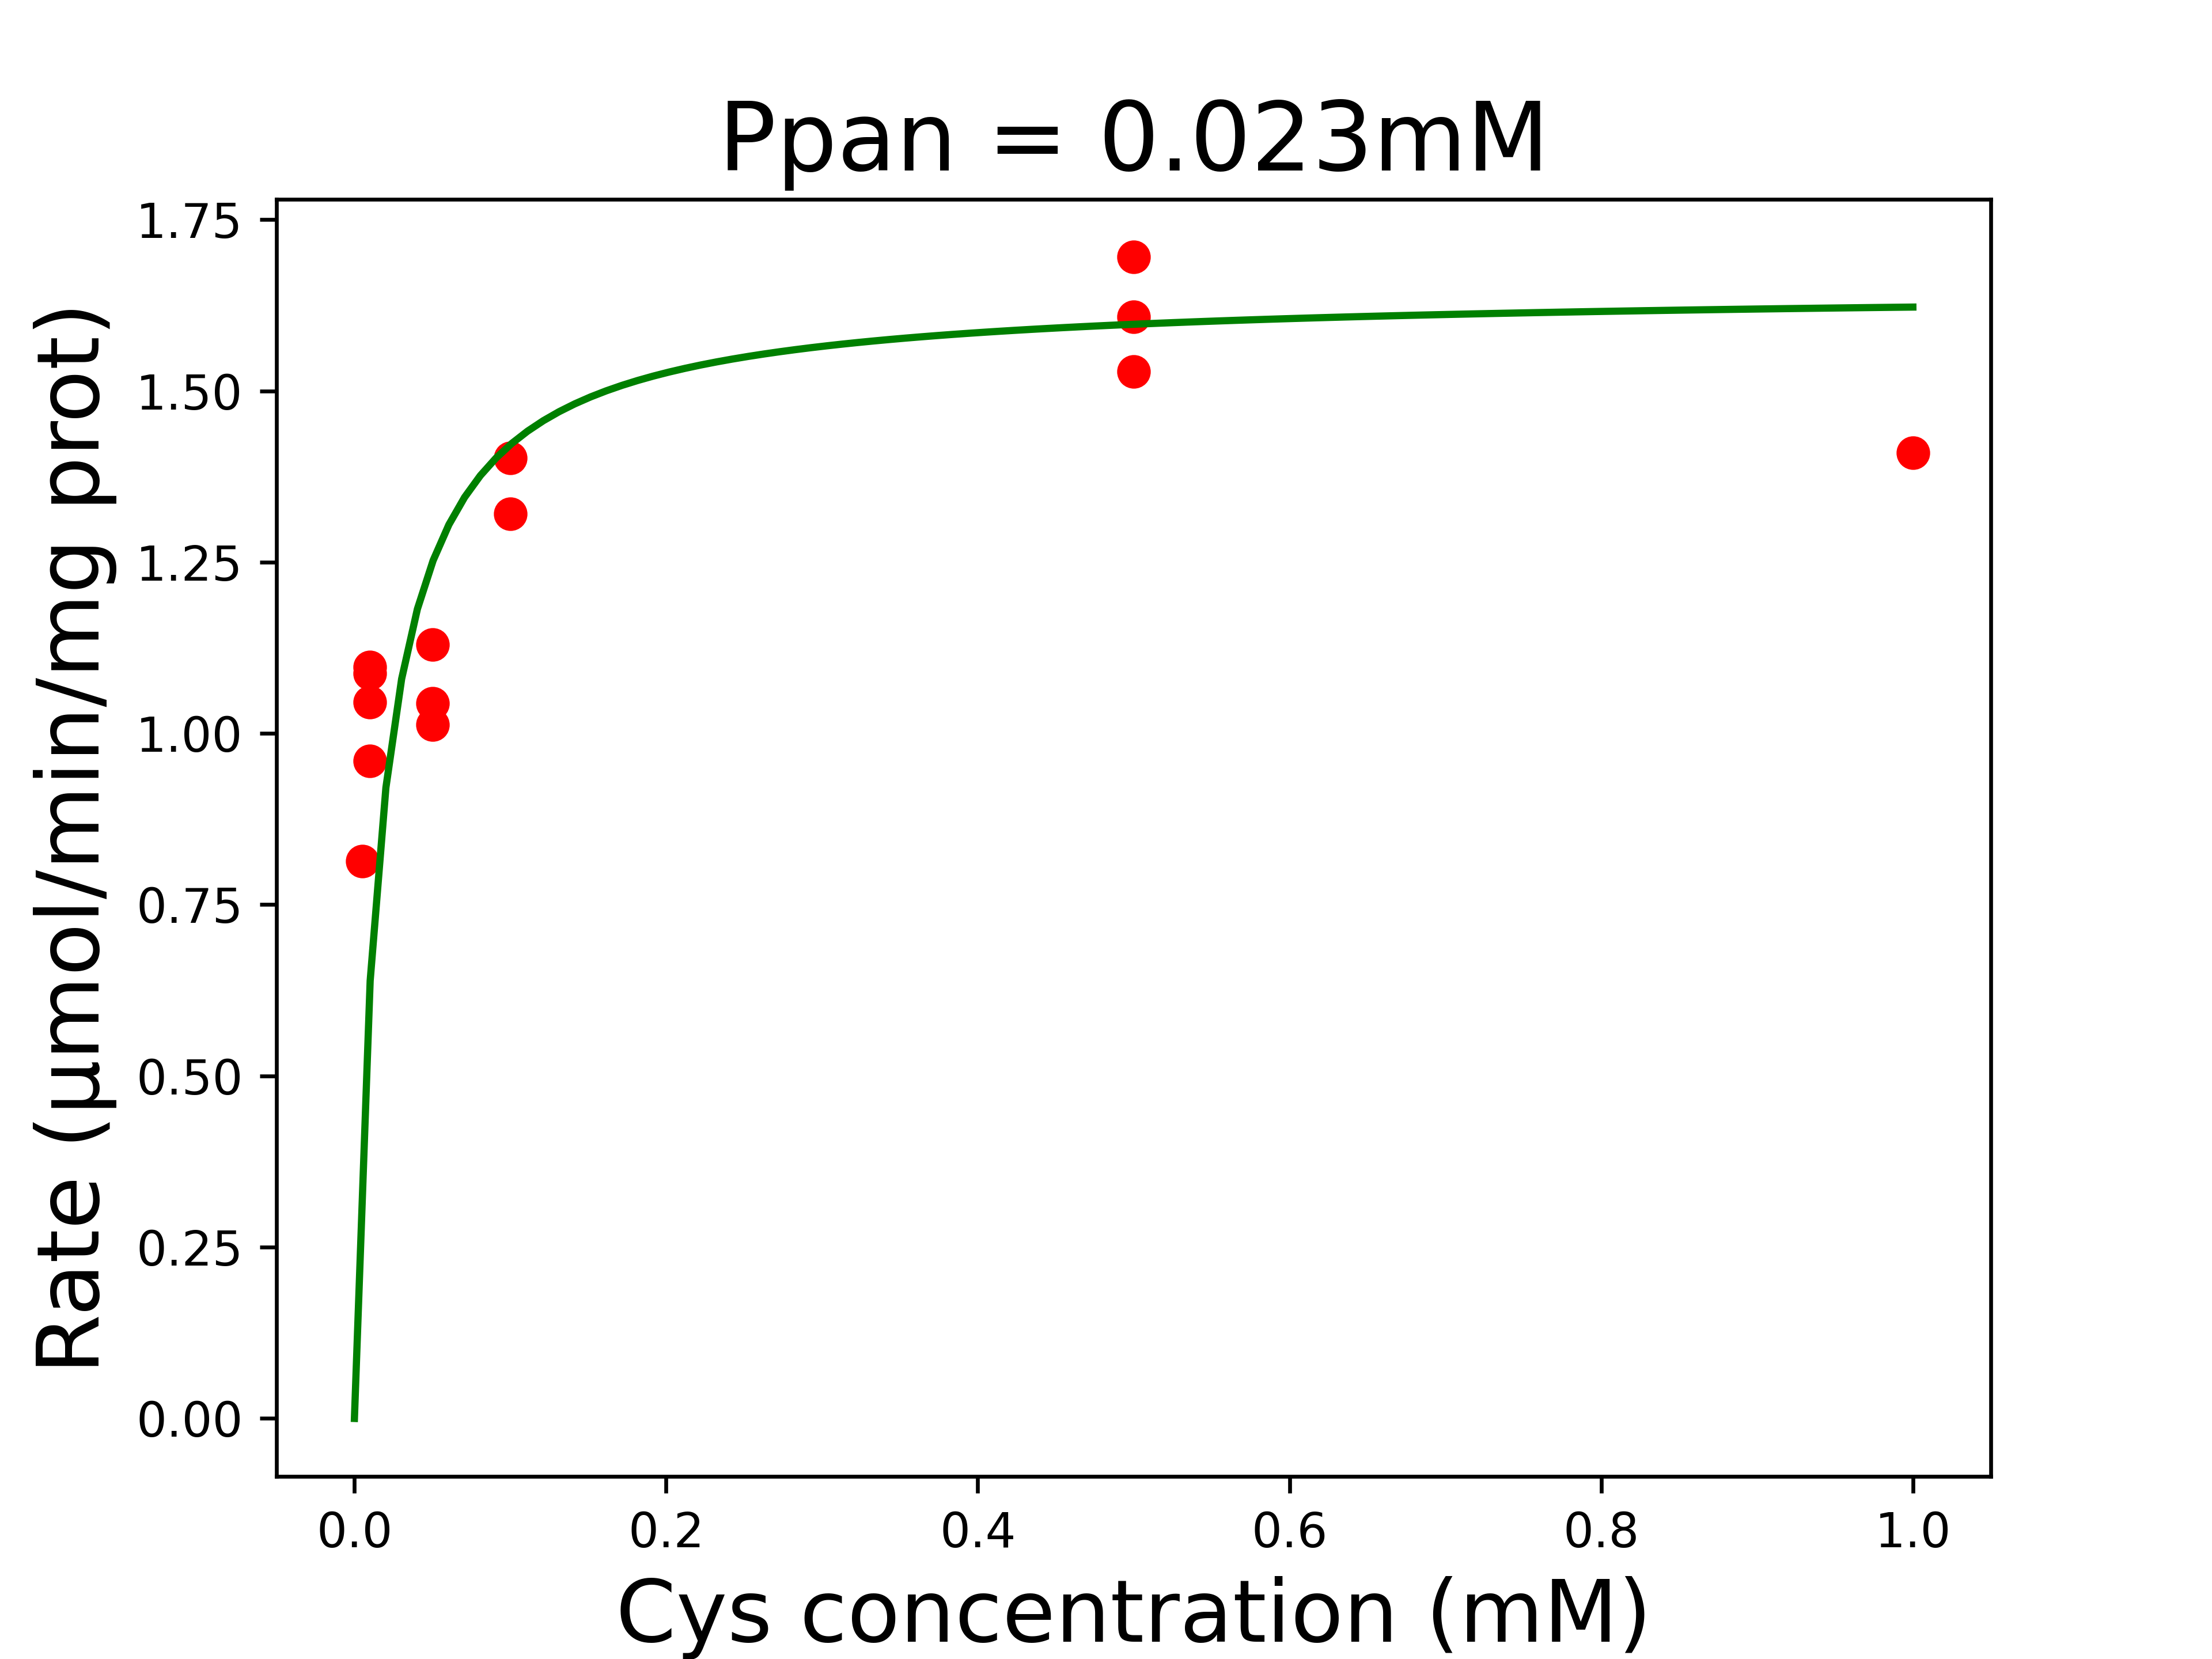

In [20]:
cys_vals = np.linspace(0, 1, 100)


#Plot 5:
modelfit_result1 = mymod4.eval(myfit4.params, ppan = 0.023, ctp = 1, cys = cys_vals)
filtered1 = fulldata[(fulldata.CTP == 1) & (fulldata.Ppan == 0.023)]

plt.plot(cys_vals,modelfit_result1,color='green')
plt.scatter(filtered1['Cys'],filtered1['Rate'], color='red')
plt.xlabel('Cys concentration (mM)',fontsize=18)
plt.ylabel('Rate (µmol/min/mg prot)',fontsize=18)
plt.title('Ppan = 0.023mM',fontsize=20)
plt.show()

In [21]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [22]:
plt.savefig("Cys_fig5.png")

In [23]:
plt.close('all')

## Identifiability Analysis:

In [58]:
from identifiability import conf_interval
import lmfit

In [61]:
ci = conf_interval(myfit4, myfit4, limits=0.5, return_CIclass=True, mp=False)
ci[0]

OrderedDict([('vf', (9.717901688890635, 10.919734119245424)),
             ('kppan', (0.07442829718899208, 0.09539858421152955)),
             ('kctp', (0.29767824648003743, 0.3879218642683139)),
             ('kcys', (0.014009308568208707, 0.01817383916471036))])

<IPython.core.display.Javascript object>


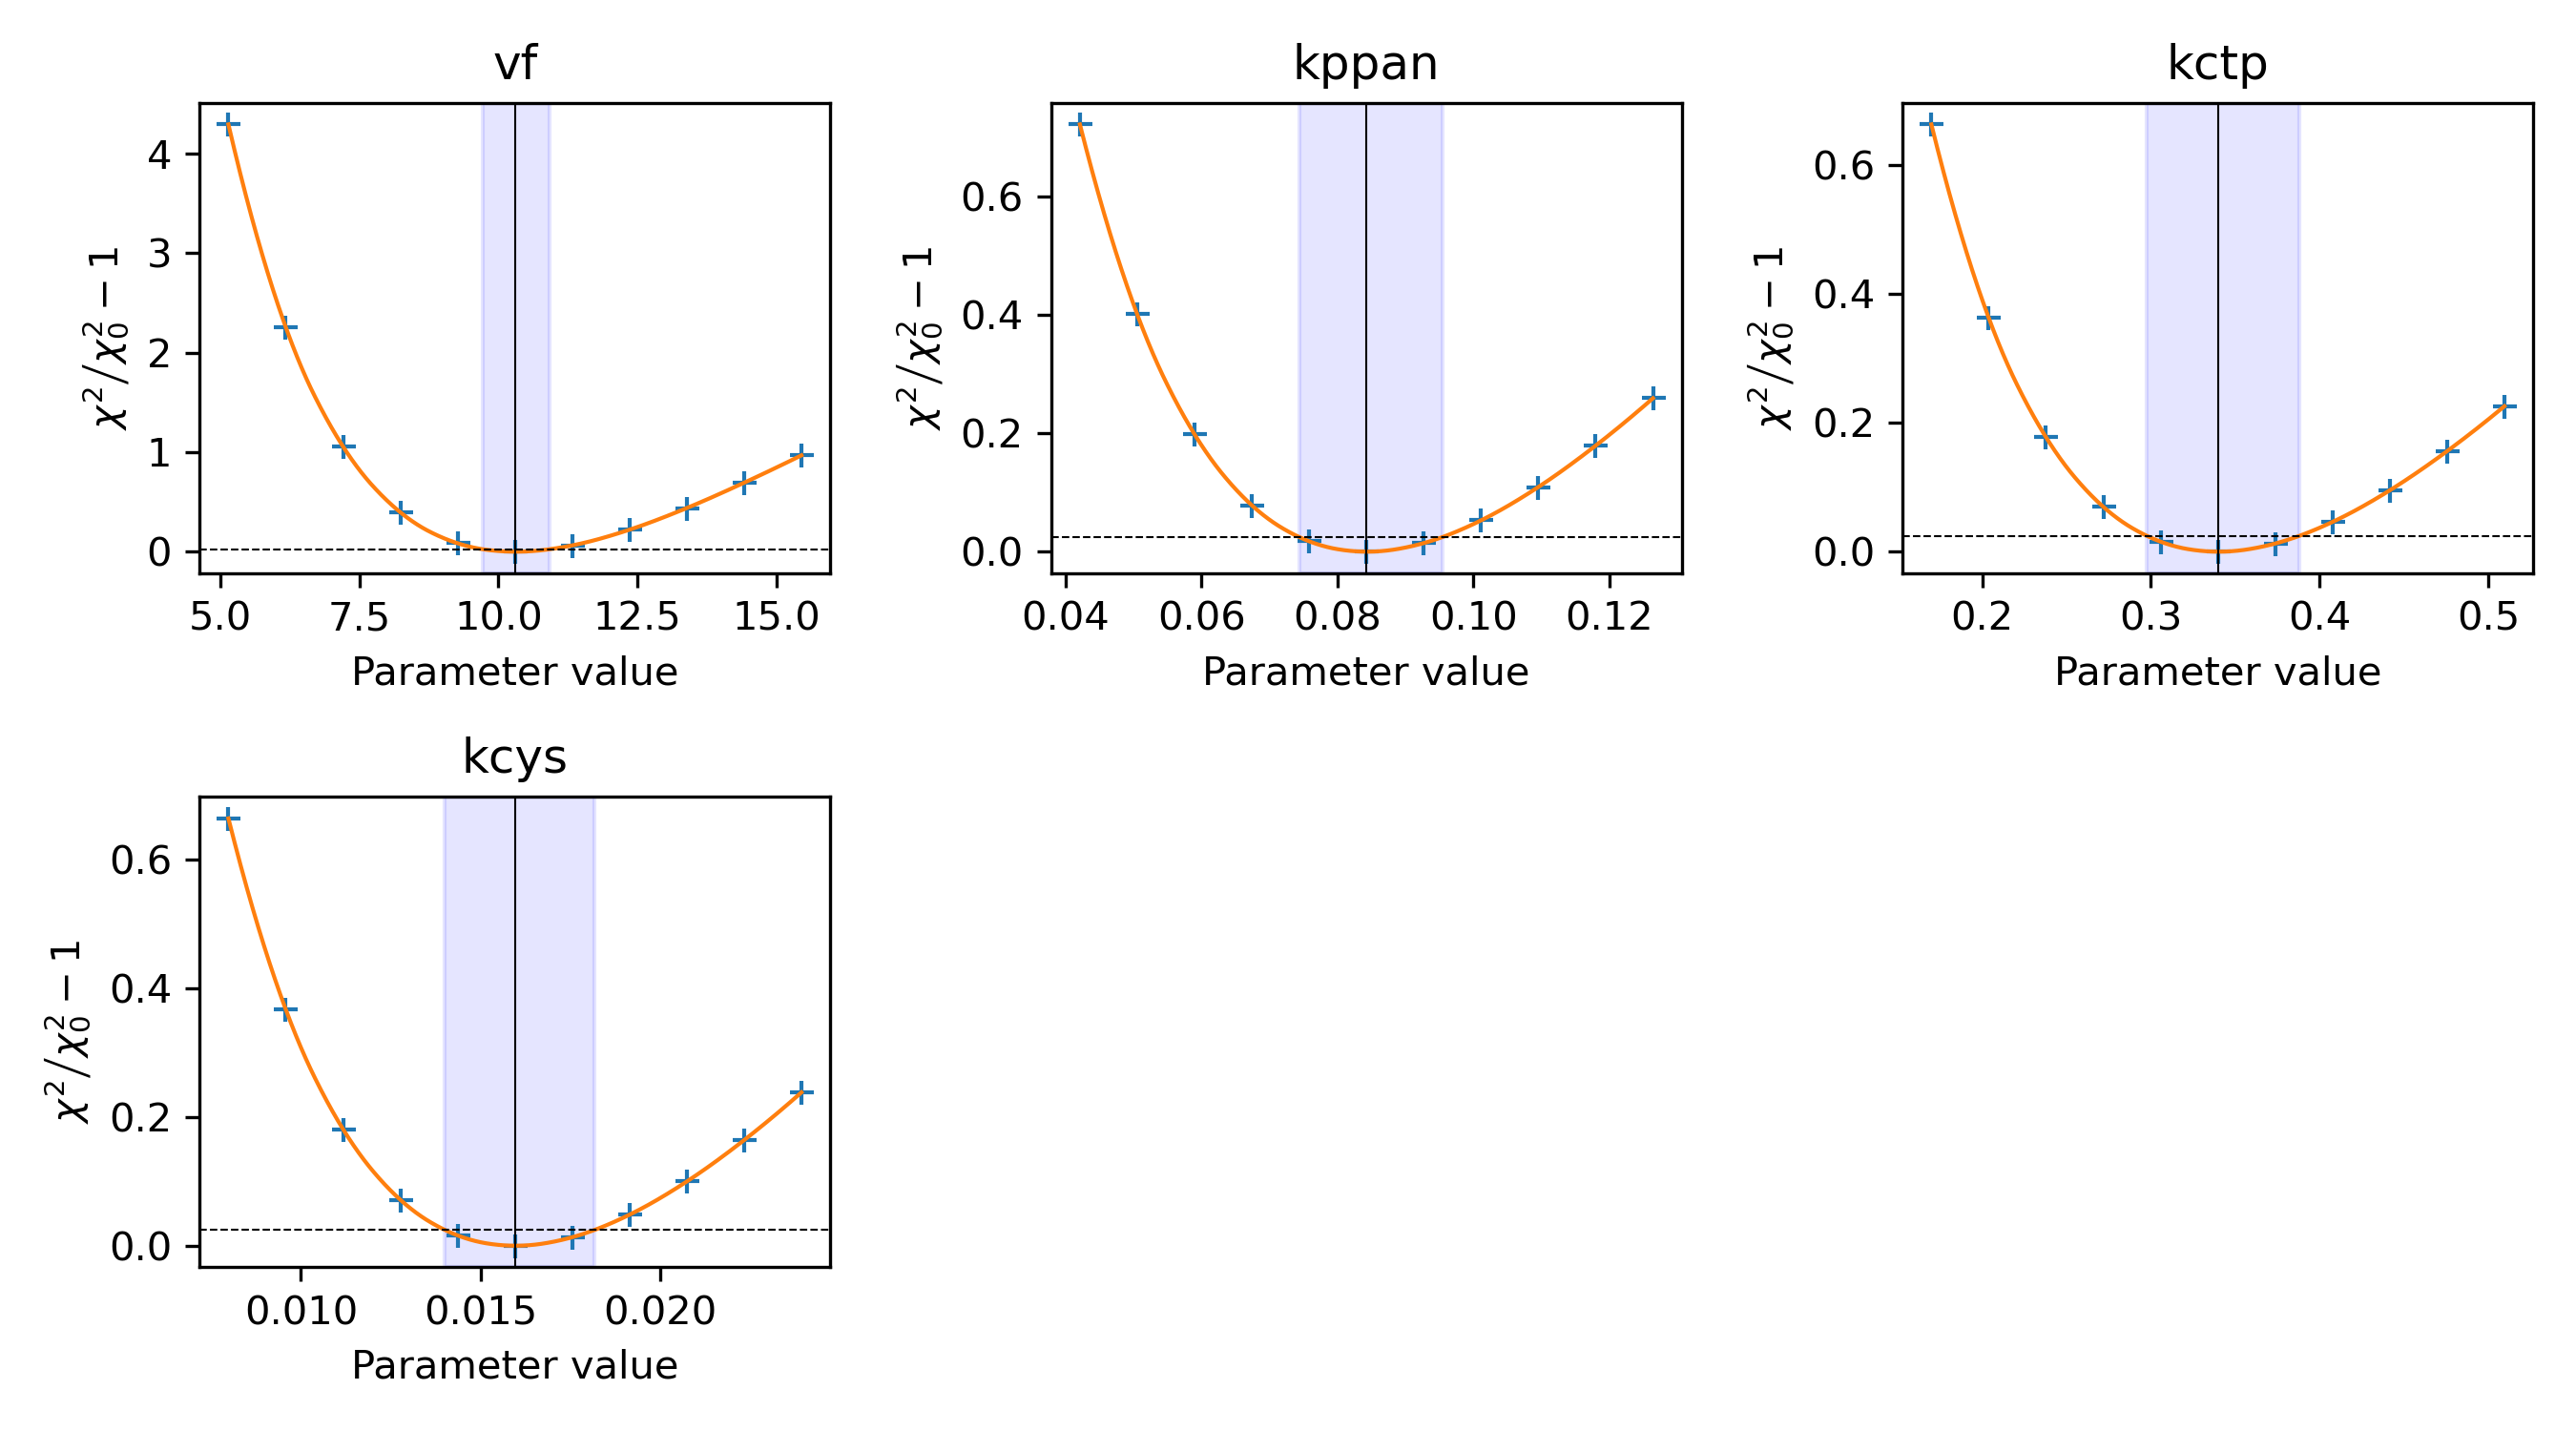

In [62]:
 ci[1].plot_all_ci()

In [63]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600
pyplot.rcParams['savefig.dpi'] = 600

In [64]:
plt.savefig("Random_ID.png")

In [65]:
plt.close('all')